<div align="center">
  <h1>Non-Dissonant incremental updates GPT2-XL</h1>
</div>


<div align="center">
<img src="../figs/Non-dissonant-experiment.png" alt="Overview of our experimental pipeline" width="1000" height="auto" style="background-color: white;">
</div>


Comparison of GPT2 small and GPT2XL: To obtain the same effect on GPT2XL; one has to increase the number of neurons by 10


### 1. Analysis of gpt2-xl behavior

Experiments were ran with:
```bash
configs=(
    "configs/gpt2-xl_experiment2_1.yml"
    "configs/gpt2-xl_experiment2_1_10xNeurons.yml"
    "configs/gpt2-xl_experiment2_1_10xlr.yml"
    "configs/gpt2-xl_experiment2_1_best_lr.yml"
    "configs/gpt2-xl_experiment2_1epochs50s.yml"
)
for config in "${configs[@]}"
do
    accelerate launch experiments_scripts/exp_2_1.py --config "$config"
done
```

Leading to the following result files:
```
- Best LR: 2k to 20k best LR (lr = 1e-5): experiment_2_1_20240716_114247.json => experiment_2_1_20240913_013018_bestLR.json
- 10 X Neurons: 20k to 200k best_LR (lr1e-5): experiment_2_1_20240717_115823.json  => experiment_2_1_20240911_181551_bestLR_10XNeurons.json
- 10X Best LR: 2k to 20k 10Xbest_LR: experiment_2_1_20240912_203810_10xLR.json
- 10X more epochs: 2k to 20k => 50 epochs => experiment_2_1_20240912_150705epochs50s.json
- Same LR as gpt2small: 2k to 20k => same LR as GPT2small => experiment_2_1_20240911_135230_sameLRassmall.json 

```

### 2. Systematic study of LR effect on knowledge ingestions in few targetted neurons

Experiments were ran with:
```bash
configs=(
    "configs/sparsity_lr/gpt2-xl_experiment2_1_2000_6000_2e-5.yml"
    "configs/sparsity_lr/gpt2-xl_experiment2_1_2000_6000_4e-5.yml"
    "configs/sparsity_lr/gpt2-xl_experiment2_1_2000_6000_8e-5.yml"
	"configs/sparsity_lr/gpt2-xl_experiment2_1_2000_6000_12e-5.yml"
    "configs/sparsity_lr/gpt2-xl_experiment2_1_2000_6000_16e-5.yml"
    "configs/sparsity_lr/gpt2-xl_experiment2_1_2000_6000_3e-4.yml"
    "configs/sparsity_lr/gpt2-xl_experiment2_1_2000_6000_5e-4.yml"
    "configs/sparsity_lr/gpt2-xl_experiment2_1_2000_6000_7e-4.yml"
    "configs/sparsity_lr/gpt2-xl_experiment2_1_2000_6000_1e-3.yml" 
)
for config in "${configs[@]}"
do
    accelerate launch experiments_scripts/exp_2_1.py --config "$config"
done
```

```
sparsity_lr experiment with 2k and 6k neurons only, as a function of lr:
experiment_2_1_2000_6000_12e-5.json
experiment_2_1_2000_6000_16e-5.json
experiment_2_1__2000_6000_2e-5.json
experiment_2_1_2000_6000_4e-5.json
experiment_2_1_2000_6000_8e-5.json
experiment_2_1_20240910_182813_2000_6000_3e-4.json
experiment_2_1_20240910_195406_2000_6000_5e-4.json
experiment_2_1_20240910_212013_2000_6000_7e-4.json
experiment_2_1_20240910_224610_2000_6000_1e-4.json
```

## 1. GPT2 XL in the same conditions as GPT2 small (from 2k to 20k) best LR 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


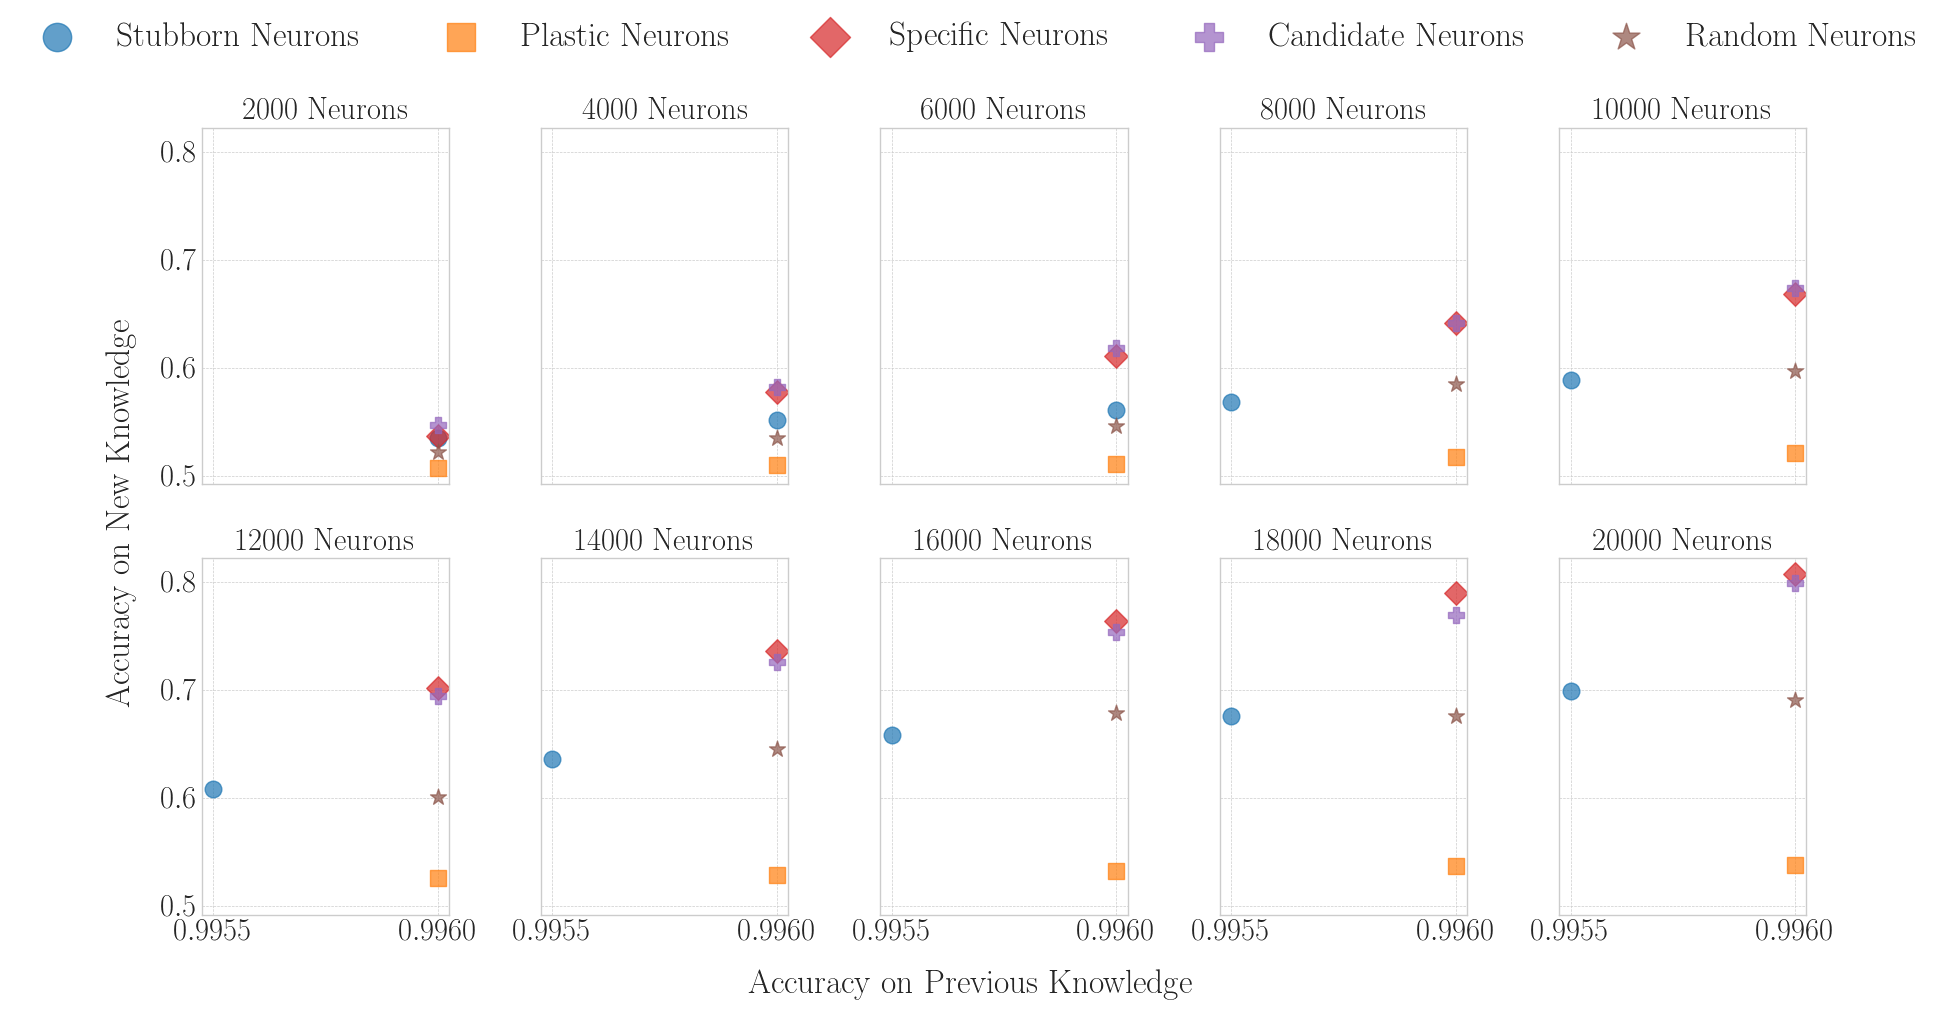

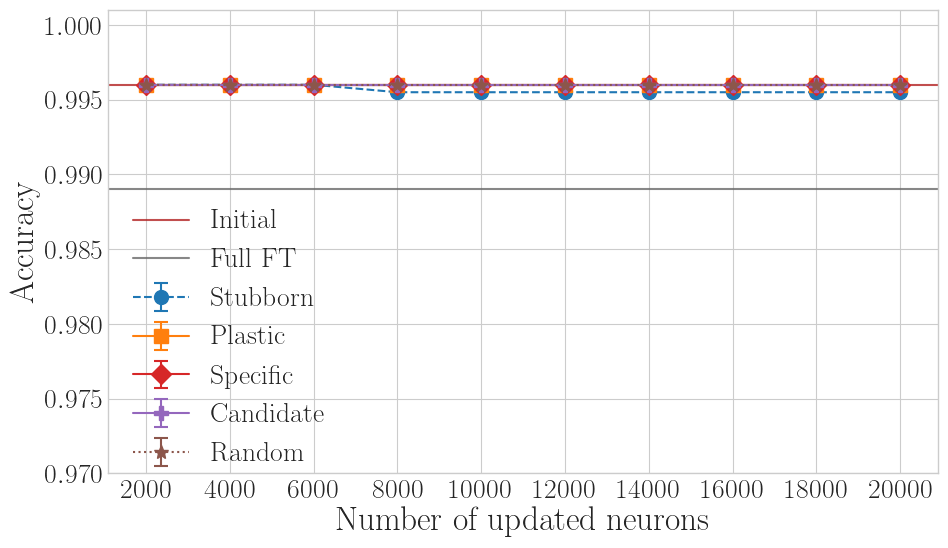

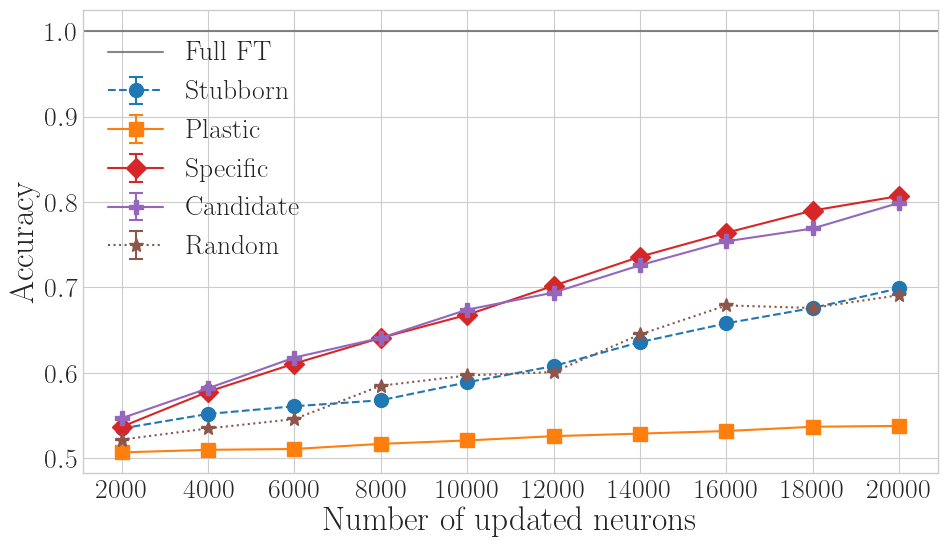

In [2]:
%load_ext autoreload
%autoreload 2

from retained_plots import plot_pareto_mosaic, plot_old_new_knowledge_all


experiment_name = 'experiment2_1_xl'
filepath = '../experiments/gpt2-xl/experiment_2_1/results/'
filename = 'experiment_2_1_20240913_013018_bestLR.json'

# plot_pareto_mosaic(filepath, filename, experiment_name=experiment_name, strategies=['busy_A', 'free_A', 'spec_B', 'busy_B', 'rnd'])
# plot_old_new_knowledge_all(filepath, filename, experiment_name, strategies=['busy_A', 'free_A', 'spec_B', 'busy_B', 'rnd'])
plot_pareto_mosaic(filepath, filename, experiment_name=experiment_name, strategies=['busy_A', 'free_A', 'spec_B', 'busy_B', 'rnd'])
plot_old_new_knowledge_all(filepath, filename, experiment_name, strategies=['busy_A', 'free_A',  'spec_B', 'busy_B', 'rnd'],loc_old='lower left',bbox_old=(0,-0.04),loc_new='upper left', bbox_new=(0,0.985), y_lim_old_1=0.97, y_lim_old_2=1.001)


## 2. GPT2 XL with 10 times more neurons filled to observe the same effects as GPT2 small 

Note that due to a typo, I've ran 400k neurons instead of 40k neurons. Besides, the 60k neurons run failed. Leaving the results below (no access to redo experiment anymore)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


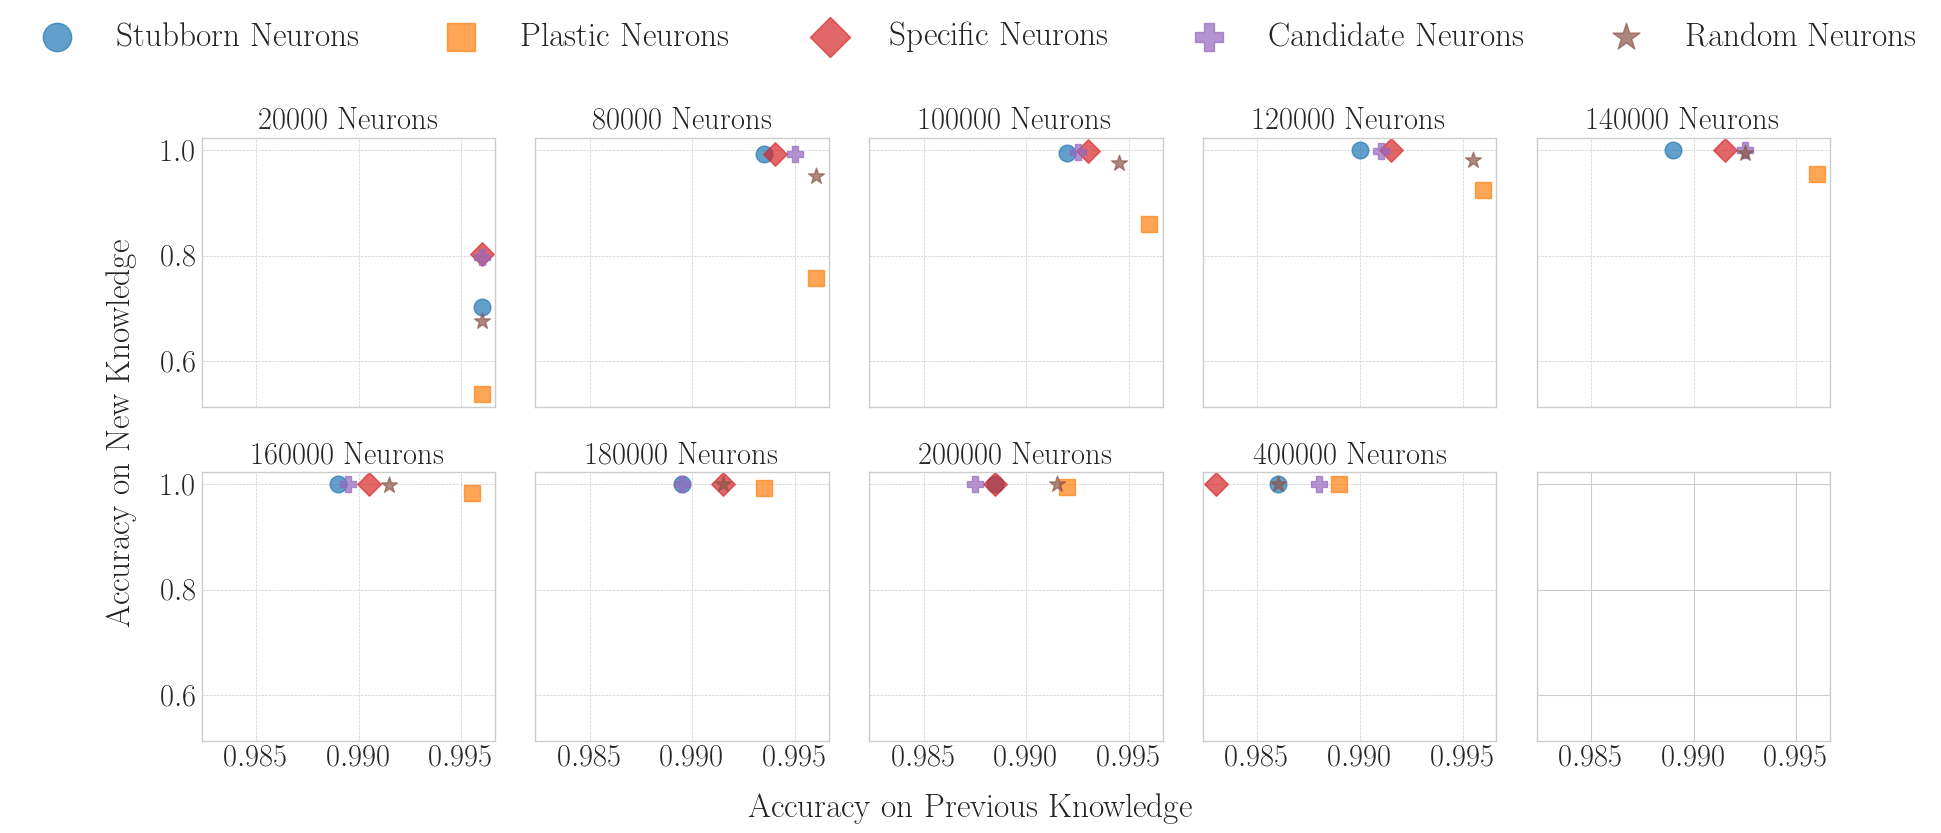

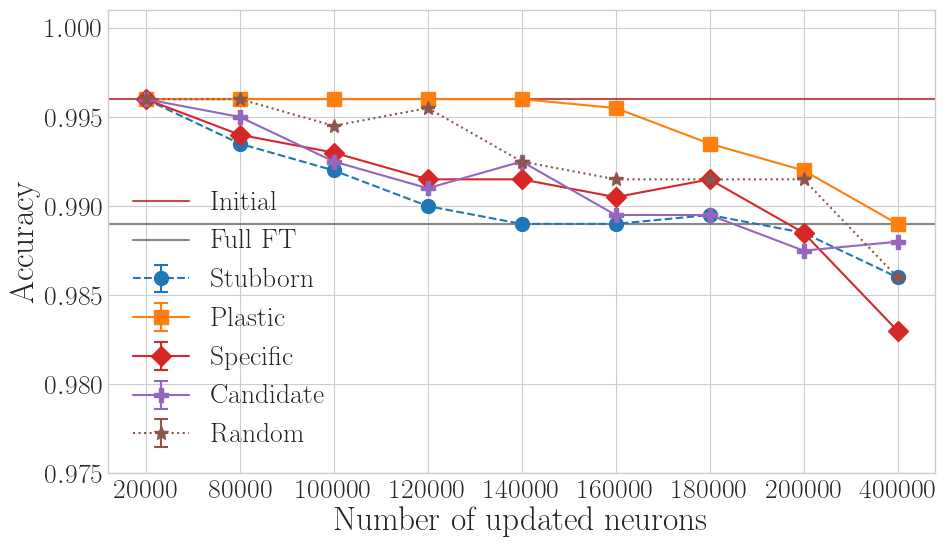

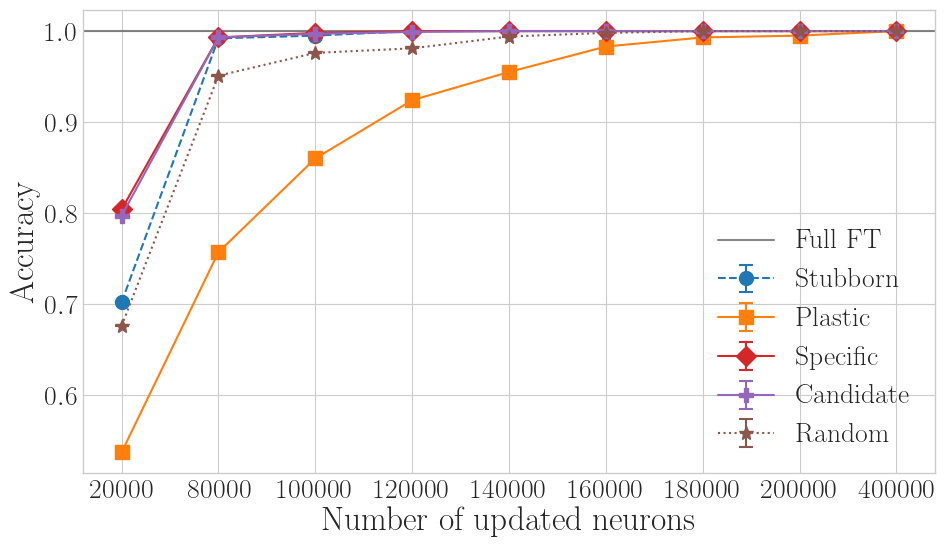

In [3]:
%load_ext autoreload
%autoreload 2

from retained_plots import plot_pareto_mosaic,plot_pareto_mosaic_10xneurons, plot_old_new_knowledge_all

experiment_name = 'experiment2_1_xl'
filepath = '../experiments/gpt2-xl/experiment_2_1/results/'
filename = 'experiment_2_1_20240911_181551_bestLR_10XNeurons.json'

plot_pareto_mosaic_10xneurons(filepath, filename, experiment_name=experiment_name, strategies=['busy_A', 'free_A', 'spec_B', 'busy_B', 'rnd'])
plot_old_new_knowledge_all(filepath, filename, experiment_name, strategies=['busy_A', 'free_A', 'spec_B', 'busy_B', 'rnd'],loc_old='lower left',bbox_old=(0,0.),loc_new='lower right', bbox_new=(1,0), y_lim_old_1=0.975, y_lim_old_2=1.001)


## 3. GPT2 XL with a high learning rate: to make sure we can capture more knowledge

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


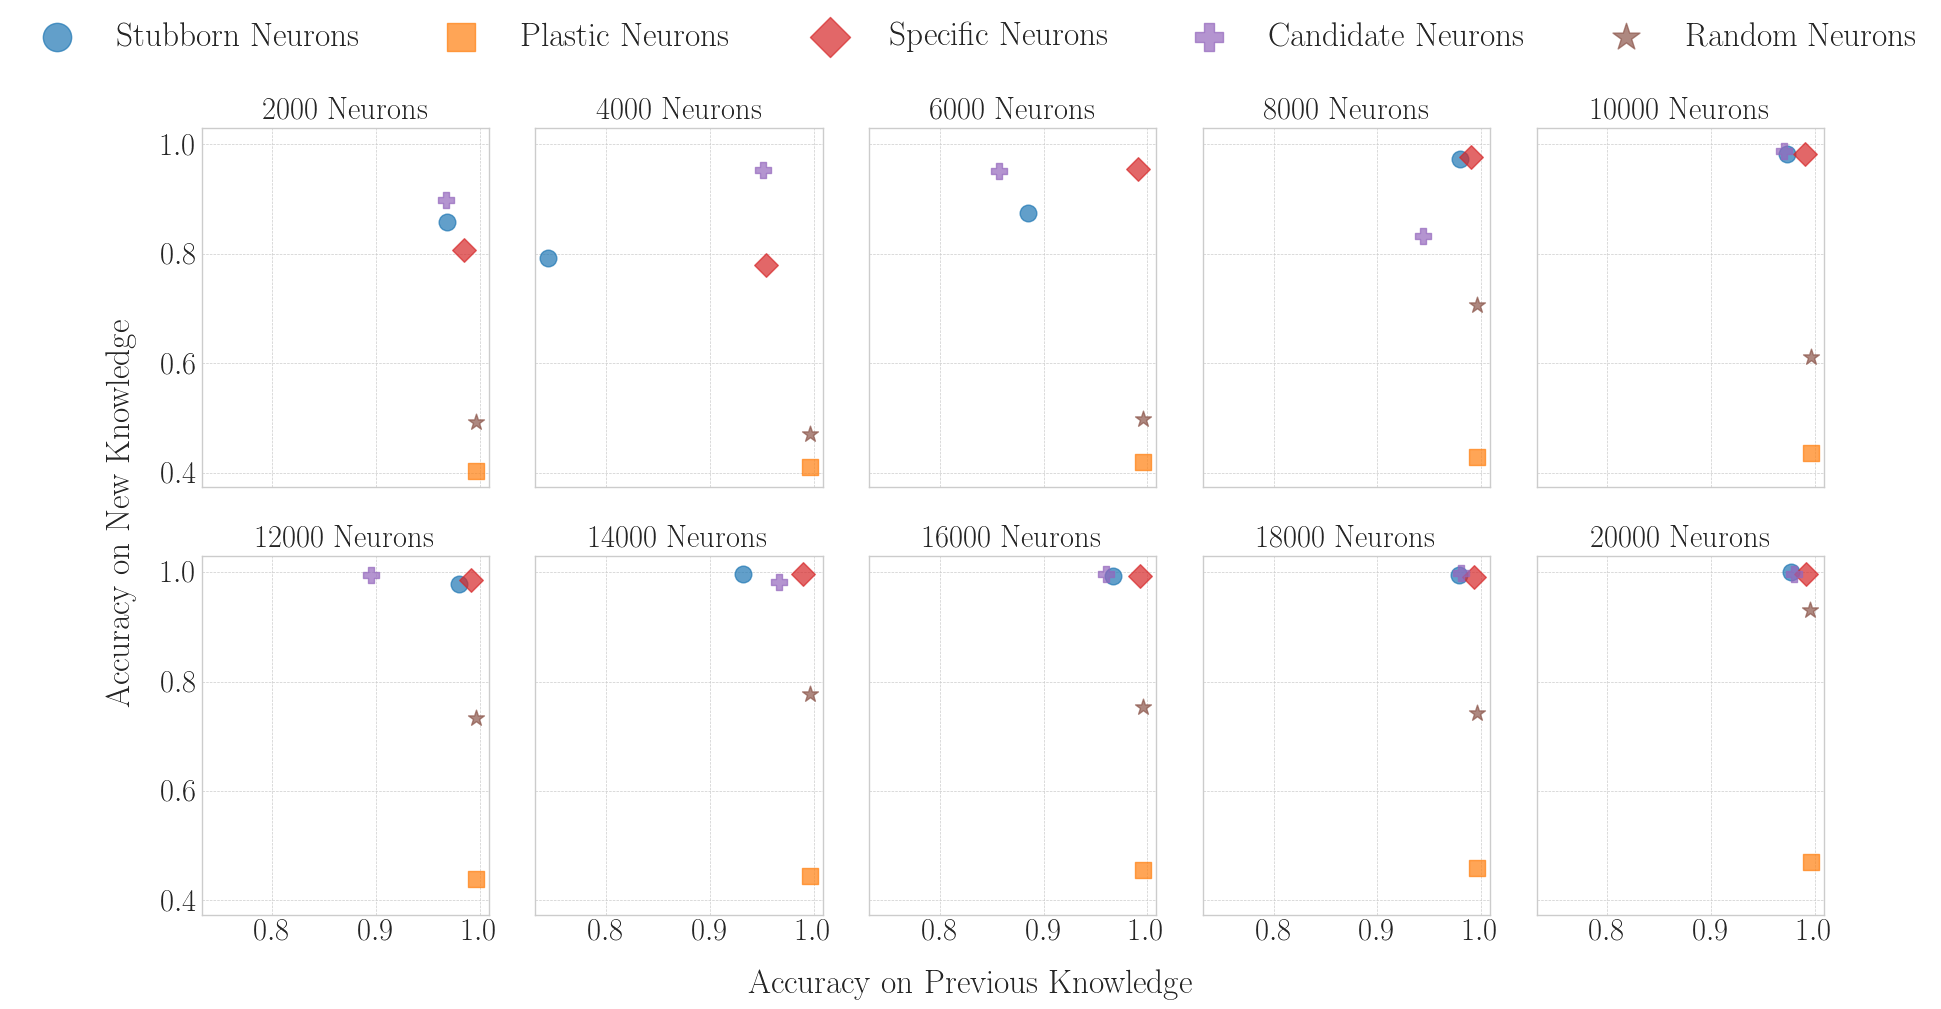

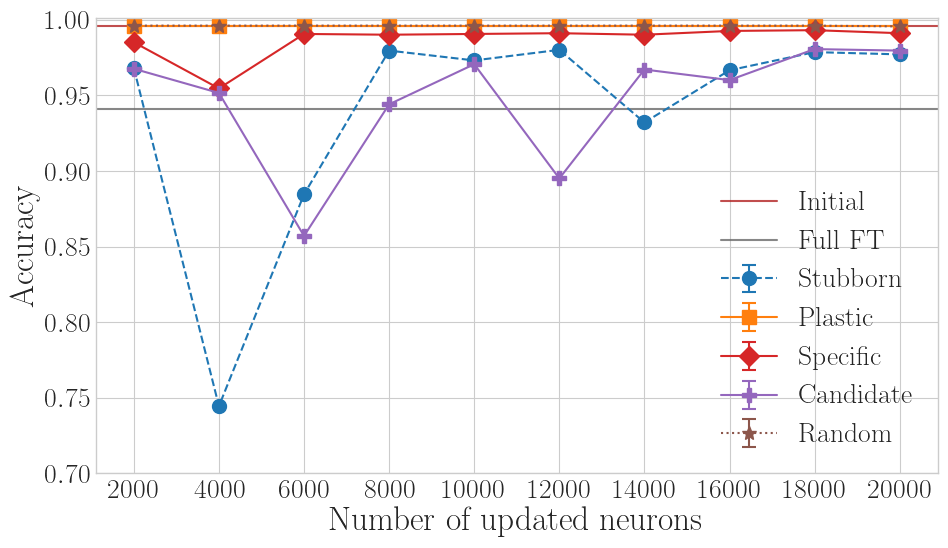

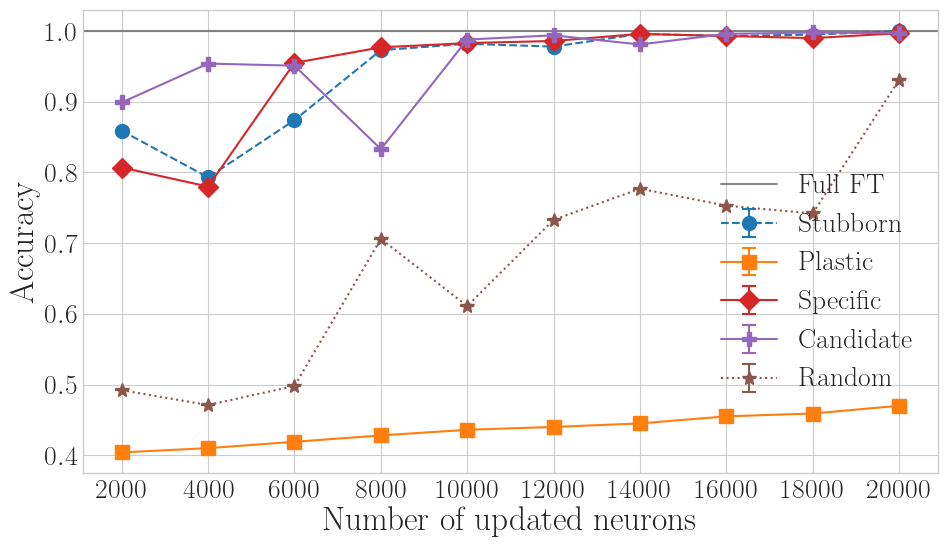

In [4]:
%load_ext autoreload
%autoreload 2

from retained_plots import plot_pareto_mosaic, plot_old_new_knowledge_all
# 2k to 20k lr16e-5: experiment_2_1_20240718_120049.json

experiment_name = 'experiment2_1_xl'
filepath = '../experiments/gpt2-xl/experiment_2_1/results/'
filename = 'experiment_2_1_20240912_203810_10xLR.json'
# - 2k to 20k 10xbest LR (lr1e-5): experiment_2_1_20240912_203810_10xLR.json
# - 2k to 20k => 50 epochs => experiment_2_1_20240912_150705epochs50s.json

plot_pareto_mosaic(filepath, filename, experiment_name=experiment_name, strategies=['busy_A', 'free_A', 'spec_B', 'busy_B', 'rnd'])
plot_old_new_knowledge_all(filepath, filename, experiment_name, strategies=['busy_A', 'free_A', 'spec_B', 'busy_B', 'rnd'],loc_old='lower right',bbox_old=(1,0.0),loc_new='lower right', bbox_new=(1,0.12), y_lim_old_1=0.7, y_lim_old_2=1.001)


## 4. GPT2 XL with more epochs: to see if e.g. "Free" would ultimately learn something in the long run

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


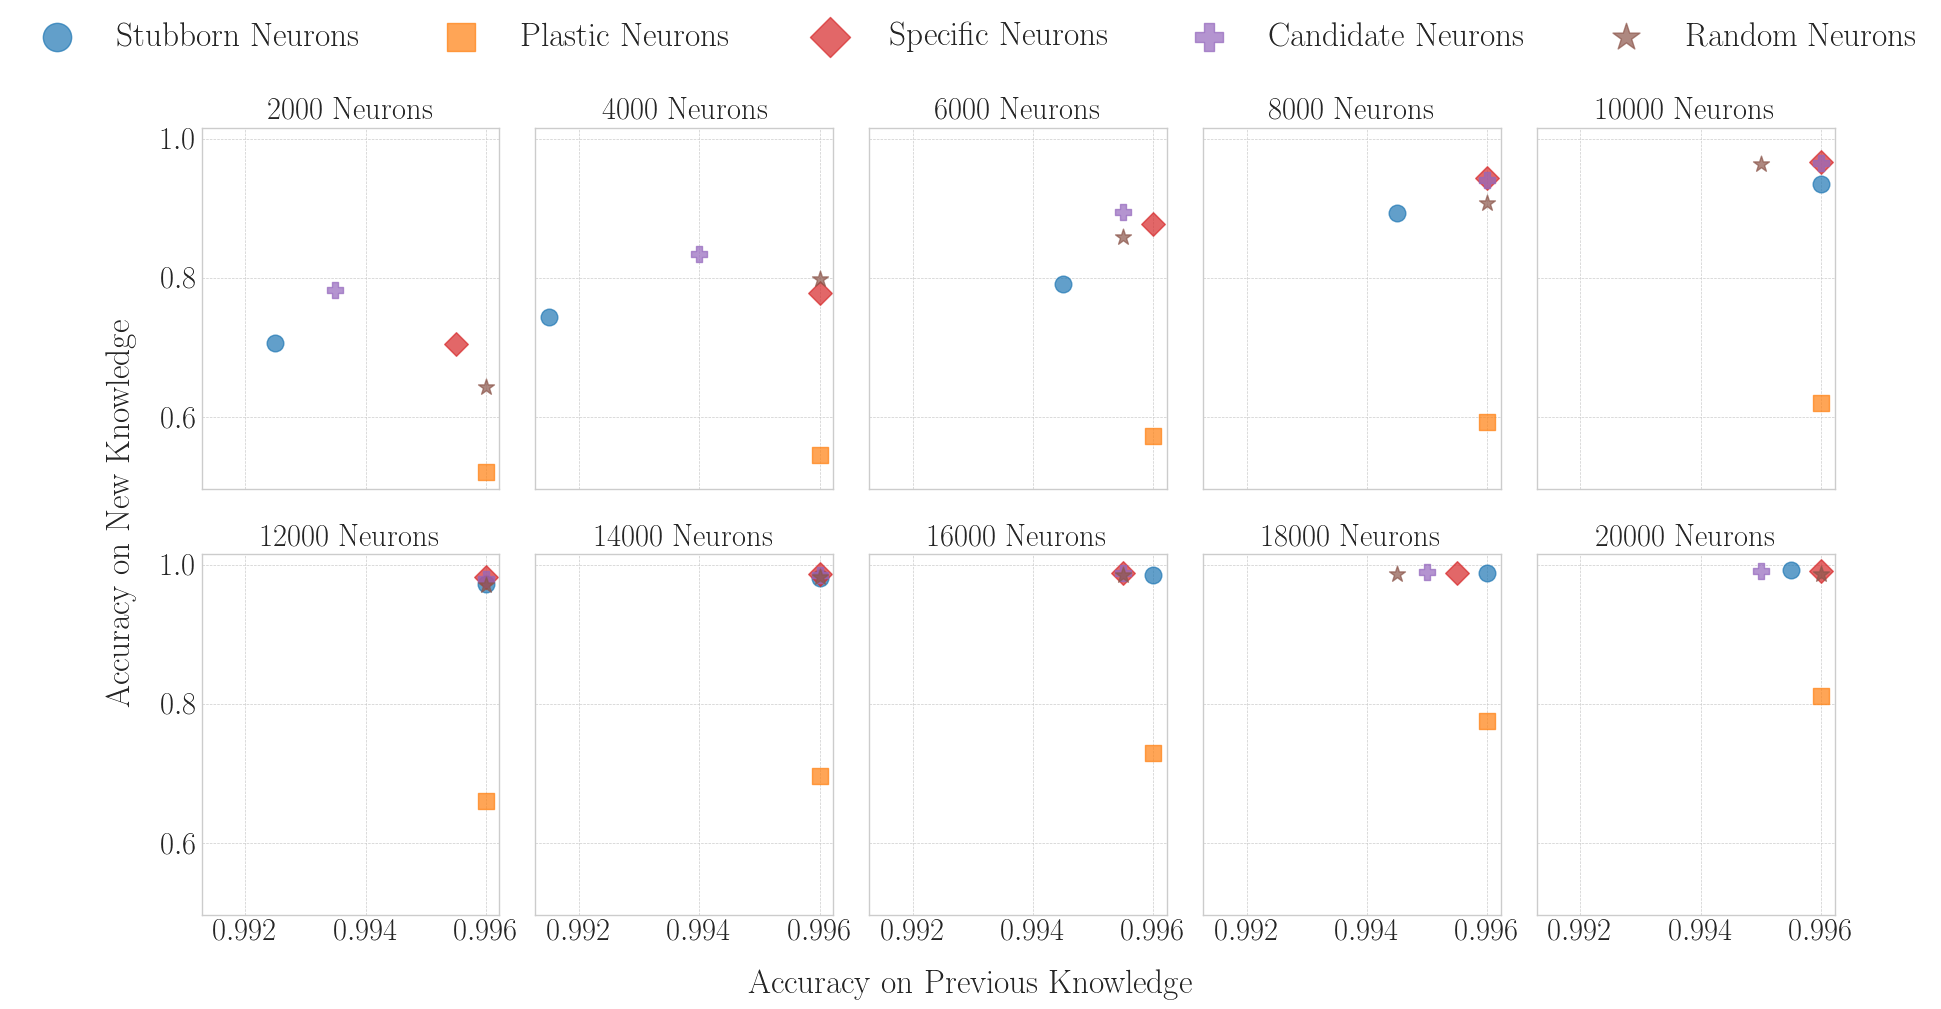

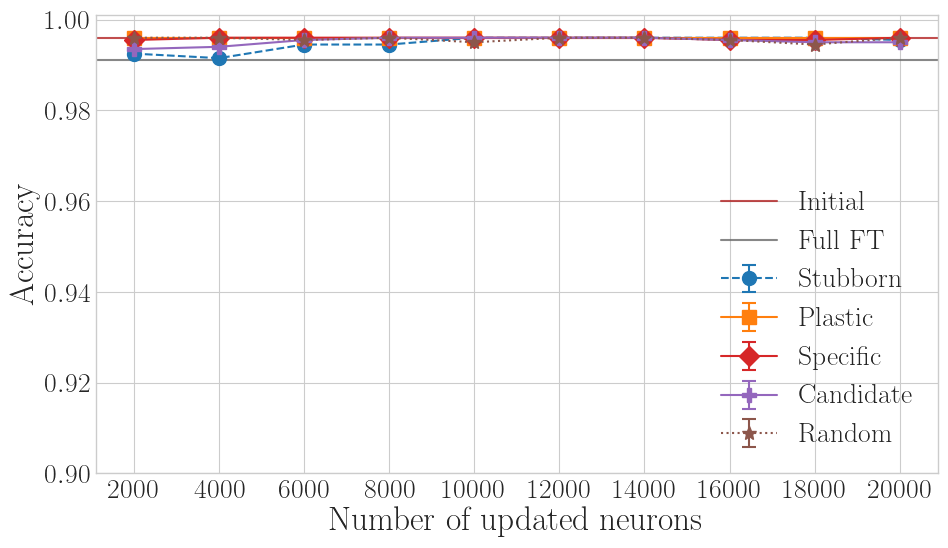

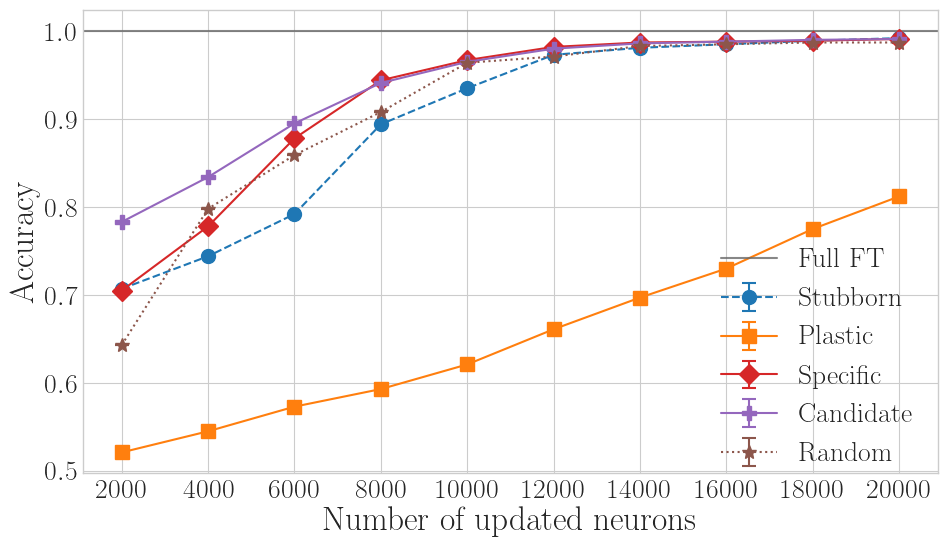

In [7]:
%load_ext autoreload
%autoreload 2

from retained_plots import plot_pareto_mosaic, plot_old_new_knowledge_all
# 2k to 20k lr16e-5: experiment_2_1_20240718_120049.json

experiment_name = 'experiment2_1_xl'
filepath = '../experiments/gpt2-xl/experiment_2_1/results/'
filename = 'experiment_2_1_20240912_150705epochs50s.json'
# - 2k to 20k 10xbest LR (lr1e-5): experiment_2_1_20240912_203810_10xLR.json
# - 2k to 20k => 50 epochs => experiment_2_1_20240912_150705epochs50s.json

plot_pareto_mosaic(filepath, filename, experiment_name=experiment_name, strategies=['busy_A', 'free_A', 'spec_B', 'busy_B', 'rnd'])
plot_old_new_knowledge_all(filepath, filename, experiment_name, strategies=['busy_A', 'free_A', 'spec_B', 'busy_B', 'rnd'],loc_old='lower right',bbox_old=(1,0),loc_new='lower right', bbox_new=(1,-0.04), y_lim_old_1=0.9, y_lim_old_2=1.001)

## 5. Knowledge ingestion as a function of learning rate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Saving figure to ./figures/experiment2_1_xl_lr_study/experiment2_1_xl_lr_study_old_knowledge_2000_neurons.pdf


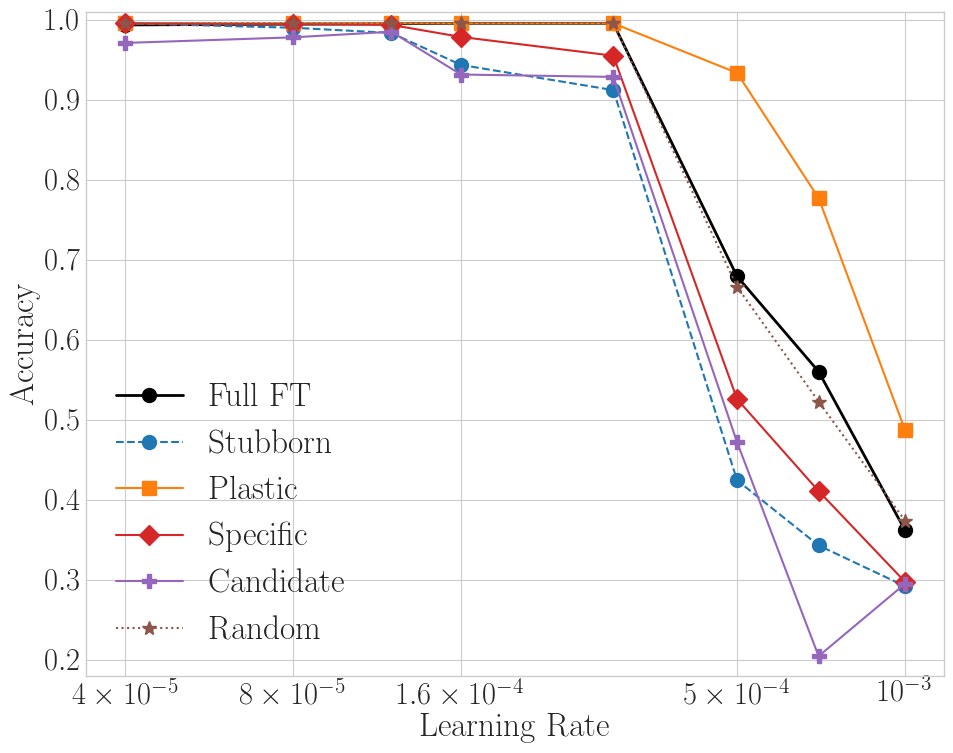

Saving figure to ./figures/experiment2_1_xl_lr_study/experiment2_1_xl_lr_study_new_knowledge_2000_neurons.pdf


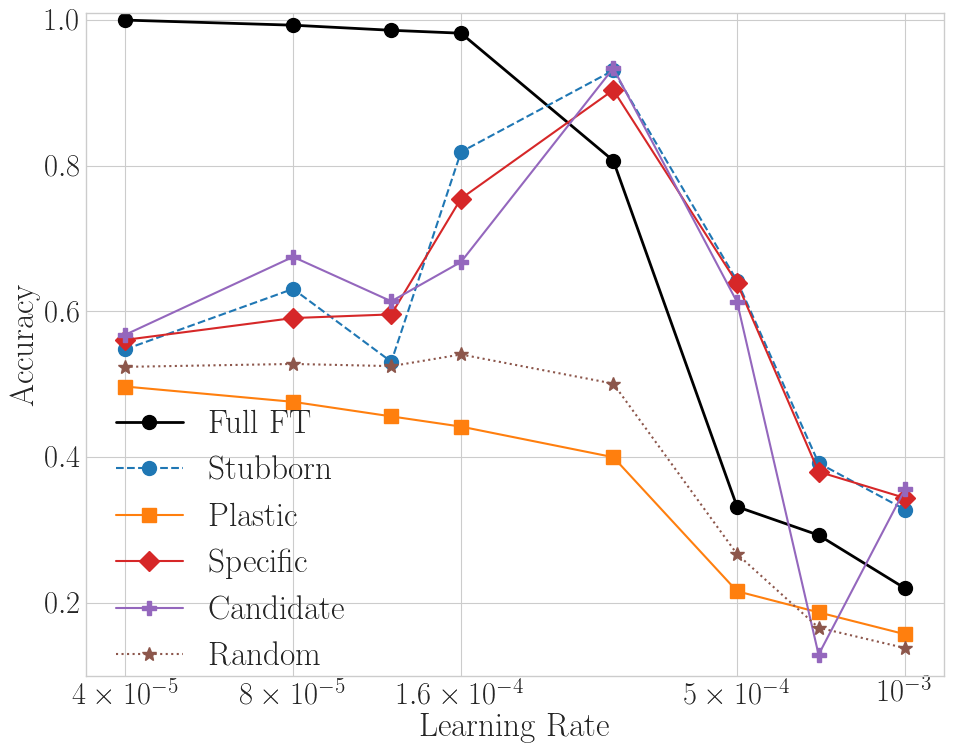

Saving figure to ./figures/experiment2_1_xl_lr_study/experiment2_1_xl_lr_study_old_knowledge_6000_neurons.pdf


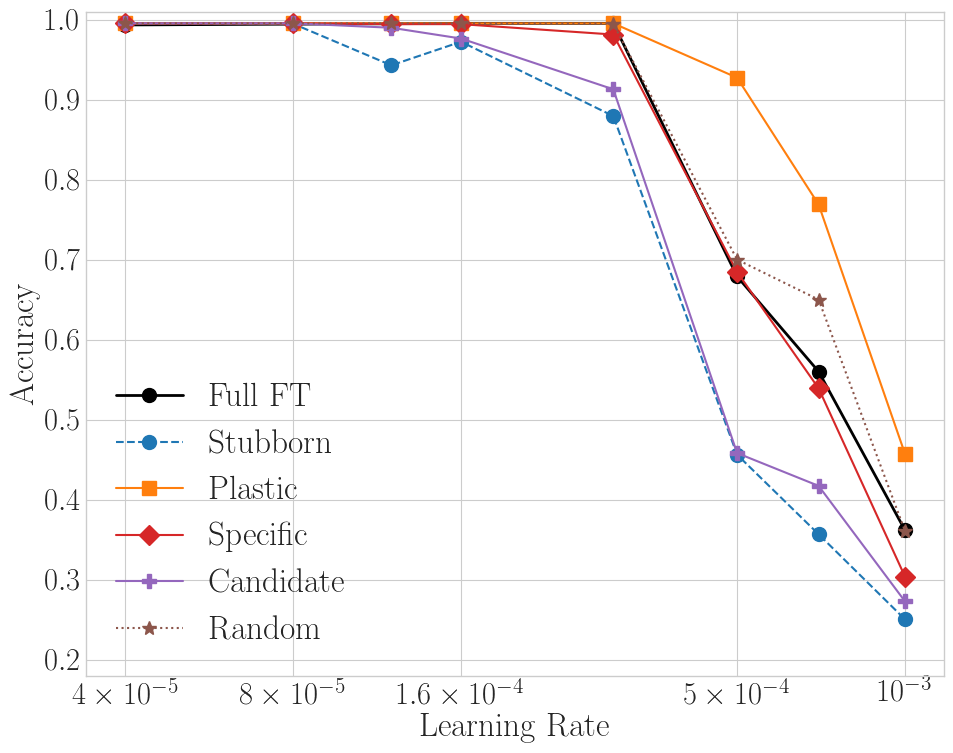

Saving figure to ./figures/experiment2_1_xl_lr_study/experiment2_1_xl_lr_study_new_knowledge_6000_neurons.pdf


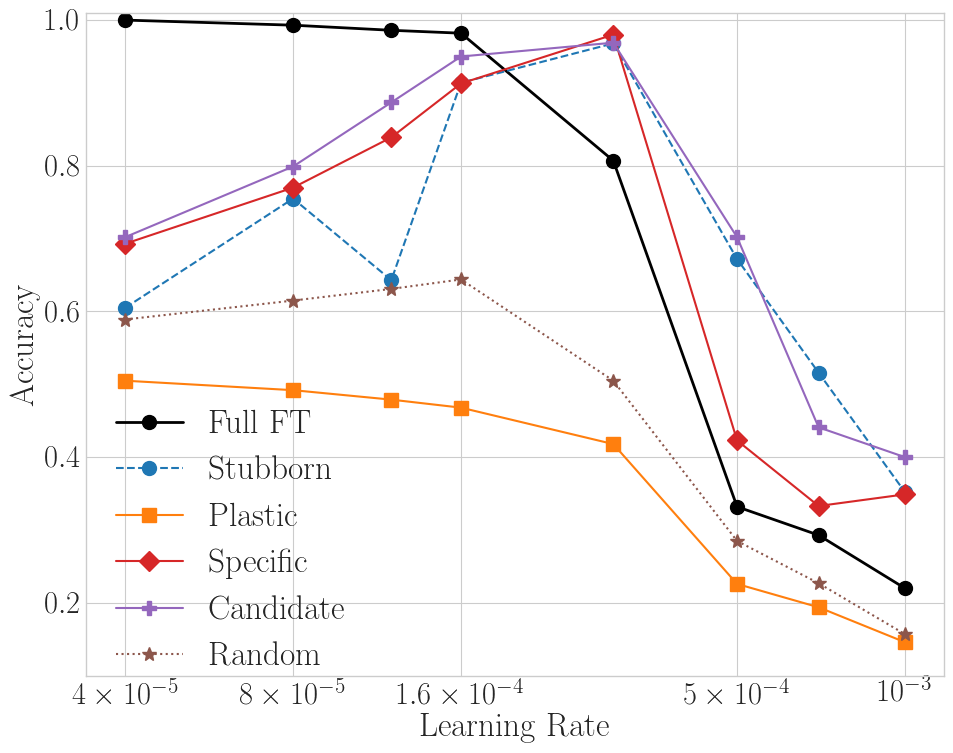

In [52]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import json
import numpy as np
import os
from retained_plots import strategy_map, strategy_map_short
from matplotlib.ticker import LogLocator, FuncFormatter


def four_plot_accuracy_vs_lr(filepath, experiment_files, experiment_name, strategies=None, loc_old='lower left', bbox_old=(0, 0.1), loc_new='lower right', bbox_new=(1, 0), y_lim_old_1=0.0, y_lim_old_2=1.001):
    plt.style.use('seaborn-whitegrid')
    plt.rcParams.update({
        'font.size': 22,
        'axes.labelsize': 24,
        'axes.titlesize': 24,
        'xtick.labelsize': 24,
        'ytick.labelsize': 22,
        'legend.fontsize': 24,
        'font.family': 'serif',
        'text.usetex': True,
        'figure.figsize': (10, 8)
    })

    # Create output directory if it doesn't exist
    output_dir = f"./figures/{experiment_name}"
    os.makedirs(output_dir, exist_ok=True)

    all_strategies = list(strategy_map_short.keys())
    if strategies is None:
        strategies = all_strategies

    learning_rates = []
    results = {strategy: {'accA': [], 'accB': []} for strategy in strategies}
    full_finetuning_results = {'accA': [], 'accB': []}

    for filename in experiment_files:
        with open(os.path.join(filepath, filename), 'r') as file:
            data = json.load(file)

        # Extract learning rate from JSON data
        lr = data['specs']['lr_B']
        learning_rates.append(lr)

        n_folds = len(data['results'].keys())
        fold_full_finetuning_accA = np.zeros(n_folds)
        fold_full_finetuning_accB = np.zeros(n_folds)
        
        for strategy in strategies:
            if strategy not in strategy_map_short:
                print(f"Strategy '{strategy}' not found in strategy_map_short.")
                continue
                
            fold_accA = np.zeros((n_folds, 2))  # 2 for 2000 and 6000 neurons
            fold_accB = np.zeros((n_folds, 2))

            for i, fold in enumerate(data['results'].values()):
                cftb_results = fold['cftb']
                fold_accA[i, 0] = cftb_results['2000'][strategy]['avg_accA']
                fold_accA[i, 1] = cftb_results['6000'][strategy]['avg_accA']
                fold_accB[i, 0] = cftb_results['2000'][strategy]['avg_accB']
                fold_accB[i, 1] = cftb_results['6000'][strategy]['avg_accB']

                # Full finetuning
                fold_full_finetuning_accA[i] = fold['ftb']['avg_accA']
                fold_full_finetuning_accB[i] = fold['ftb']['avg_accB']

            results[strategy]['accA'].append(np.mean(fold_accA, axis=0))
            results[strategy]['accB'].append(np.mean(fold_accB, axis=0))
        full_finetuning_results['accA'].append(np.mean(fold_full_finetuning_accA))
        full_finetuning_results['accB'].append(np.mean(fold_full_finetuning_accB))

    # Sort learning rates and corresponding results
    sorted_indices = np.argsort(learning_rates)
    learning_rates = [learning_rates[i] for i in sorted_indices]
    for strategy in strategies:
        results[strategy]['accA'] = [results[strategy]['accA'][i] for i in sorted_indices]
        results[strategy]['accB'] = [results[strategy]['accB'][i] for i in sorted_indices]
    full_finetuning_results['accA'] = [full_finetuning_results['accA'][i] for i in sorted_indices]
    full_finetuning_results['accB'] = [full_finetuning_results['accB'][i] for i in sorted_indices]

    # Plot for 2000 and 6000 neurons, old and new knowledge
    for neurons in ['2000', '6000']:
        for knowledge_type in ['Old', 'New']:
            fig, ax = plt.subplots(figsize=(10, 8))
            
            if knowledge_type == 'Old':
                ax.semilogx(learning_rates, full_finetuning_results['accA'], linestyle='solid', linewidth=2, color='black', marker='o', markersize=10, label='Full FT')
            else:
                ax.semilogx(learning_rates, full_finetuning_results['accB'], linestyle='solid', linewidth=2, color='black', marker='o', markersize=10, label='Full FT')

            for strategy in strategies:
                if strategy not in results or not results[strategy]['accA']:
                    print(f"No data for strategy '{strategy}'")
                    continue

                if knowledge_type == 'Old':
                    acc = [result[0 if neurons == '2000' else 1] for result in results[strategy]['accA']]
                else:
                    acc = [result[0 if neurons == '2000' else 1] for result in results[strategy]['accB']]

                ax.semilogx(learning_rates, acc, 
                        linestyle=strategy_map_short[strategy]['linestyle'], 
                        linewidth=1.5, 
                        color=strategy_map_short[strategy]['color'], 
                        marker=strategy_map_short[strategy]['marker'], 
                        markersize=10, 
                        label=strategy_map_short[strategy]['label'])

            ax.set_xlabel('Learning Rate')
            ax.set_ylabel('Accuracy')
            ax.legend(loc=loc_old if knowledge_type == 'Old' else loc_new, 
                      bbox_to_anchor=bbox_old if knowledge_type == 'Old' else bbox_new)
            ax.grid(True)
            
            if knowledge_type == 'Old':
                ax.set_ylim(y_lim_old_1, y_lim_old_2)
            else:
                ax.set_ylim(0.1,1.01)

            # Set x-axis to log scale and format ticks
            ax.set_xscale('log')
            
            # Custom tick locations
            # tick_locations = [4e-5, 8e-5, 1.2e-4, 1.6e-4, 3e-4, 5e-4, 7e-4, 1e-3]
            # ax.set_xticks(tick_locations)
            tick_locations = [4e-5, 8e-5, 1.6e-4, 5e-4,  1e-3]
            ax.set_xticks(tick_locations)                        
            def custom_formatter(x, pos):
                if x == 4e-5:
                    return r'$4 \times 10^{-5}$'
                elif x == 8e-5:
                    return r'$8 \times 10^{-5}$'
                elif x == 1.2e-4:
                    return r'$1.2 \times 10^{-4}$'
                elif x == 1.6e-4:
                    return r'$1.6 \times 10^{-4}$'
                elif x == 3e-4:
                    return r'$3 \times 10^{-4}$'
                elif x == 5e-4:
                    return r'$5 \times 10^{-4}$'
                elif x == 7e-4:
                    return r'$7 \times 10^{-4}$'
                elif x == 1e-3:
                    return r'$10^{-3}$'
                else:
                    return r'${:.1e}$'.format(x)

            ax.xaxis.set_major_formatter(FuncFormatter(custom_formatter))
            ax.tick_params(axis='x', which='major', labelsize=22)#, rotation=45)

            plt.tight_layout()
            
            output_file = f"{output_dir}/{experiment_name}_{knowledge_type.lower()}_knowledge_{neurons}_neurons.pdf"
            print(f"Saving figure to {output_file}")
            plt.savefig(output_file, format='pdf', bbox_inches='tight')
            plt.show()
            plt.close()

# Usage
filepath = '../experiments/gpt2-xl/experiment_2_1/results/sparsity_lr/'
experiment_files = [
    'experiment_2_1_2000_6000_4e-5.json',
    'experiment_2_1_2000_6000_8e-5.json',
    'experiment_2_1_2000_6000_12e-5.json',
    'experiment_2_1_2000_6000_16e-5.json',
    'experiment_2_1_20240910_182813_2000_6000_3e-4.json',
    'experiment_2_1_20240910_195406_2000_6000_5e-4.json',
    'experiment_2_1_20240910_212013_2000_6000_7e-4.json',
    'experiment_2_1_20240910_224610_2000_6000_1e-3.json'
]
experiment_name = 'experiment2_1_xl_lr_study'
strategies = ['busy_A', 'free_A', 'spec_B', 'busy_B', 'rnd']

four_plot_accuracy_vs_lr(filepath, experiment_files, experiment_name, strategies, loc_old='lower left', bbox_old=(0, 0), loc_new='lower left', bbox_new=(0, -0.04), y_lim_old_1=0.18, y_lim_old_2=1.01)

## 6. Gradient Analysis

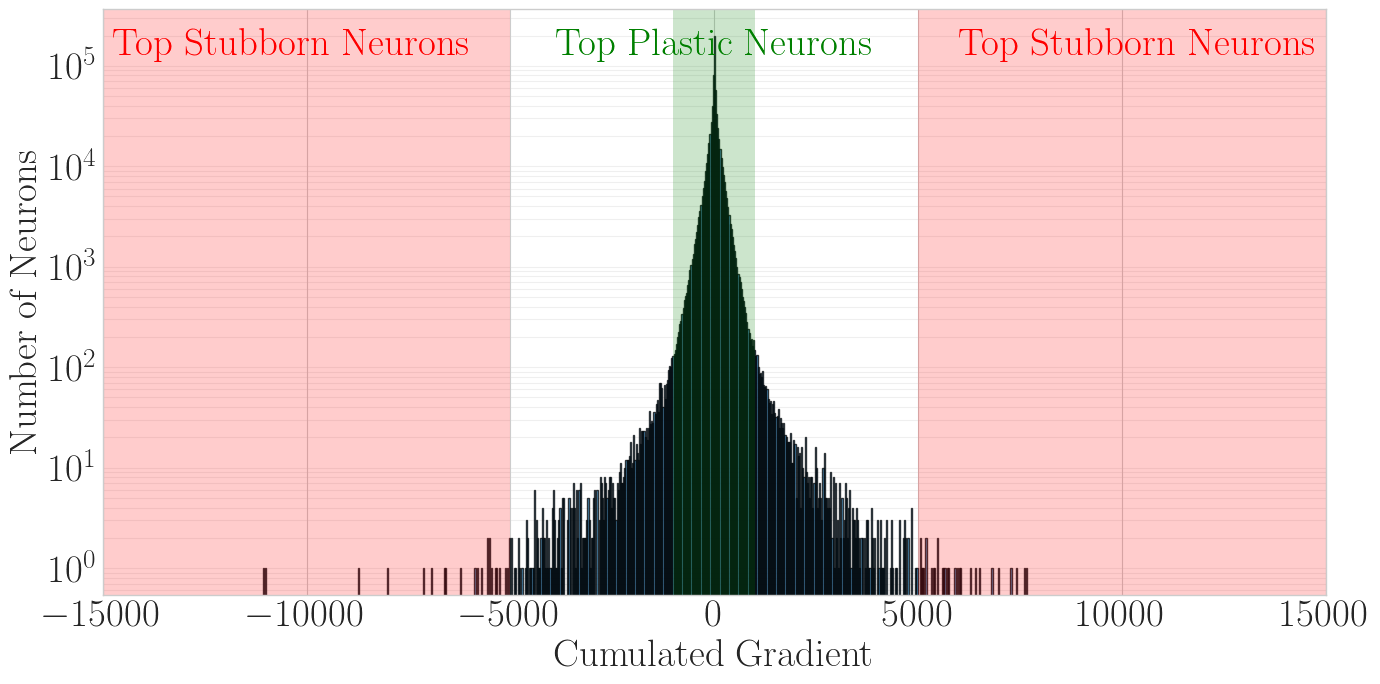

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

fontsize=28

# Set up the plot style
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'font.family': 'serif',
    'text.usetex': True,
    'figure.figsize': (8, 10)
})

# Load the data /home/MinnieMouse/project/epmem_edit
with open('../experiments/gpt2-xl/experiment_2_1/historical_data.pkl', 'rb') as file:
    data = pickle.load(file)

grad_distr = np.array([])
for layer in data['grad_hist_dict']['raw']:
    grad_distr = np.concatenate((grad_distr, data['grad_hist_dict']['raw'][layer]))

max_grad = np.max(grad_distr)
min_grad = np.min(grad_distr)

# Adjust figure size to match the first figure's height (below not correct)
height_in_inches = 6.95  # Match height of first figure
width_in_inches = (height_in_inches * 0.68 / 0.34)  # Calculate width for aspect ratio

plt.figure(figsize=(width_in_inches, height_in_inches))
n, bins, patches = plt.hist(grad_distr, bins=2000, alpha=0.75, color='tab:blue', edgecolor='black')

# Set X-axis limits to min and max values
#plt.xlim(min_grad, max_grad)
plt.xlim(-15000, 15000)

plt.xlabel('Cumulated Gradient', fontsize=fontsize)
plt.ylabel('Number of Neurons', fontsize=fontsize)
plt.yscale('log')

plt.grid(axis='y', alpha=0.3, which='both')

busy_threshold = 5000
free_threshold = 1000

plt.axvspan(min_grad, -busy_threshold, facecolor='red', alpha=0.2)
plt.axvspan(busy_threshold, max_grad, facecolor='red', alpha=0.2)
plt.axvspan(-free_threshold, free_threshold, facecolor='green', alpha=0.2)

ymax = plt.gca().get_ylim()[1] * 0.7

plt.annotate('Top Stubborn Neurons', xy=(-busy_threshold, ymax), xytext=(-busy_threshold * 1.2, ymax * 0.5), 
             color='red', fontsize=fontsize, ha='right', fontweight='bold')

plt.annotate('Top Stubborn Neurons', xy=(busy_threshold, ymax), xytext=(busy_threshold * 1.2, ymax * 0.5), 
             color='red', fontsize=fontsize, ha='left', fontweight='bold')

plt.annotate('Top Plastic Neurons', xy=(0, ymax), xytext=(0, ymax * 0.5), 
             color='green', fontsize=fontsize, ha='center', fontweight='bold')

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.tight_layout()
plt.savefig('../analysis/figures/gradient_distribution.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

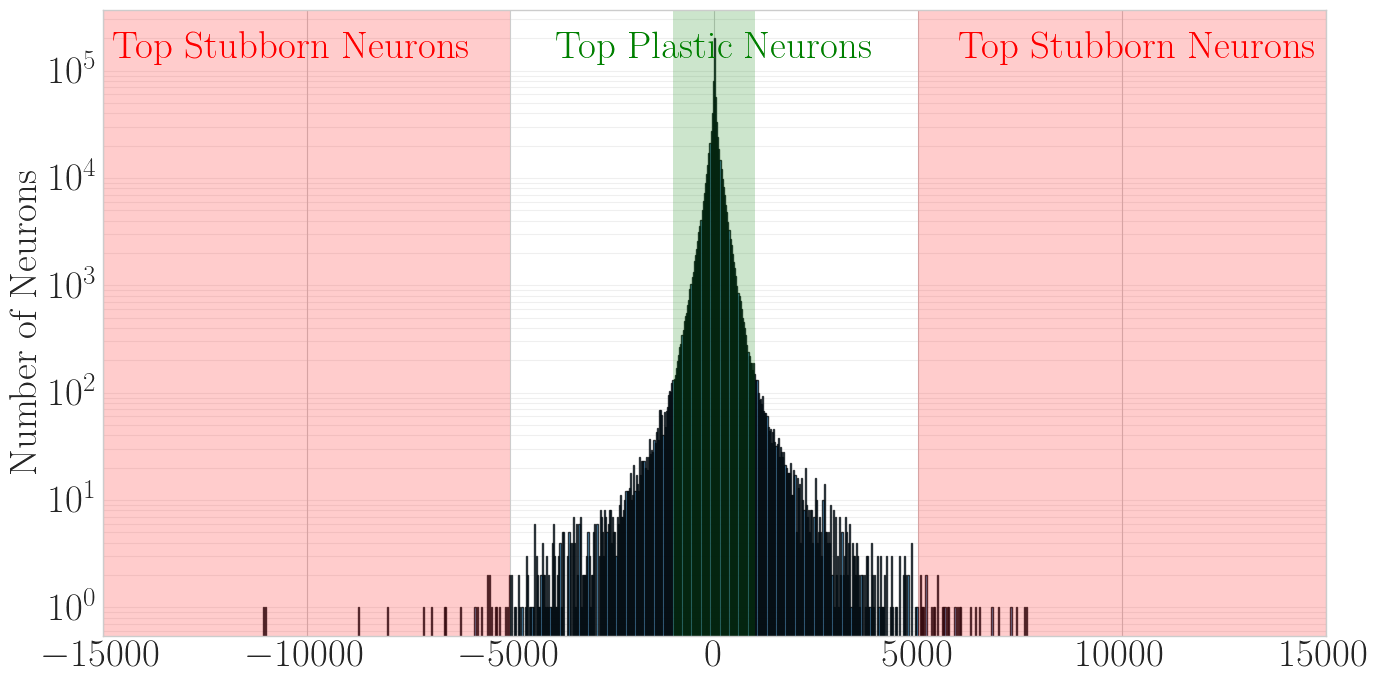

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

fontsize=28

# Set up the plot style
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'font.family': 'serif',
    'text.usetex': True,
    'figure.figsize': (8, 10)
})

# Load the data
with open('../experiments/gpt2-xl/experiment_2_1/historical_data.pkl', 'rb') as file:
    data = pickle.load(file)

grad_distr = np.array([])
for layer in data['grad_hist_dict']['raw']:
    grad_distr = np.concatenate((grad_distr, data['grad_hist_dict']['raw'][layer]))

max_grad = np.max(grad_distr)
min_grad = np.min(grad_distr)

# Adjust figure size to match the first figure's height (below not correct)
height_in_inches = 6.95  # Match height of first figure
width_in_inches = (height_in_inches * 0.68 / 0.34)  # Calculate width for aspect ratio

plt.figure(figsize=(width_in_inches, height_in_inches))
n, bins, patches = plt.hist(grad_distr, bins=2000, alpha=0.75, color='tab:blue', edgecolor='black')

# Set X-axis limits to min and max values
#plt.xlim(min_grad, max_grad)
plt.xlim(-15000, 15000)

#plt.xlabel('Cumulated Gradient', fontsize=fontsize)
plt.ylabel('Number of Neurons', fontsize=fontsize)
plt.yscale('log')

plt.grid(axis='y', alpha=0.3, which='both')

busy_threshold = 5000
free_threshold = 1000

plt.axvspan(min_grad, -busy_threshold, facecolor='red', alpha=0.2)
plt.axvspan(busy_threshold, max_grad, facecolor='red', alpha=0.2)
plt.axvspan(-free_threshold, free_threshold, facecolor='green', alpha=0.2)

ymax = plt.gca().get_ylim()[1] * 0.7

plt.annotate('Top Stubborn Neurons', xy=(-busy_threshold, ymax), xytext=(-busy_threshold * 1.2, ymax * 0.5), 
             color='red', fontsize=fontsize, ha='right', fontweight='bold')

plt.annotate('Top Stubborn Neurons', xy=(busy_threshold, ymax), xytext=(busy_threshold * 1.2, ymax * 0.5), 
             color='red', fontsize=fontsize, ha='left', fontweight='bold')

plt.annotate('Top Plastic Neurons', xy=(0, ymax), xytext=(0, ymax * 0.5), 
             color='green', fontsize=fontsize, ha='center', fontweight='bold')

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.tight_layout()
plt.savefig('../analysis/figures/gradient_distribution.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

## 6. Busy Neurons across layers

Saving figure to ./figures/experiment2_1_xl/experiment2_1_xl_stubborn_neurons_stubborn_neurons_histogram_8000.pdf


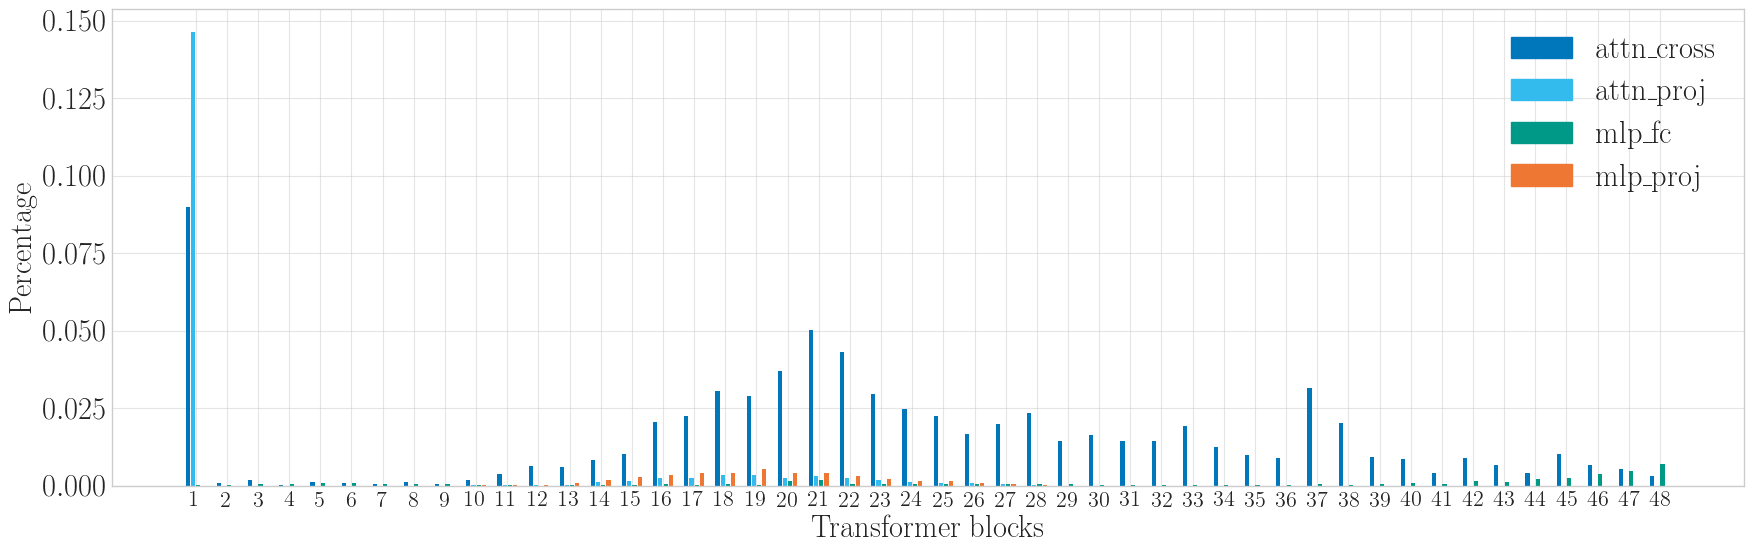

In [2]:
%load_ext autoreload
%autoreload 2

from retained_plots import plot_pareto_mosaic, plot_old_new_knowledge_all, plot_stubborn_neurons_histogram
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json
import importlib
import os
import pickle
import sys
# custom path insertion
sys.path.append(os.path.abspath('..'))
import utils 
importlib.reload(utils)
from utils import *


t=8000

# Sample dictionary with numpy arrays as values
data, num_neurons, count = stubborn_extraction(
    historical_path='../experiments/gpt2-xl/experiment_2_1/historical_data.pkl',
    norm=False,
    inverse=True,
    threshold=t,
    return_stubborn=False
    )

output_dir = "./figures/experiment2_1_xl"
experiment_name = "experiment2_1_xl_stubborn_neurons"
plot_stubborn_neurons_histogram(data, t, output_dir, experiment_name)

Saving figure to ./figures/experiment2_1_xl/experiment2_1_xl_stubborn_neurons_stubborn_neurons_histogram_2000.pdf


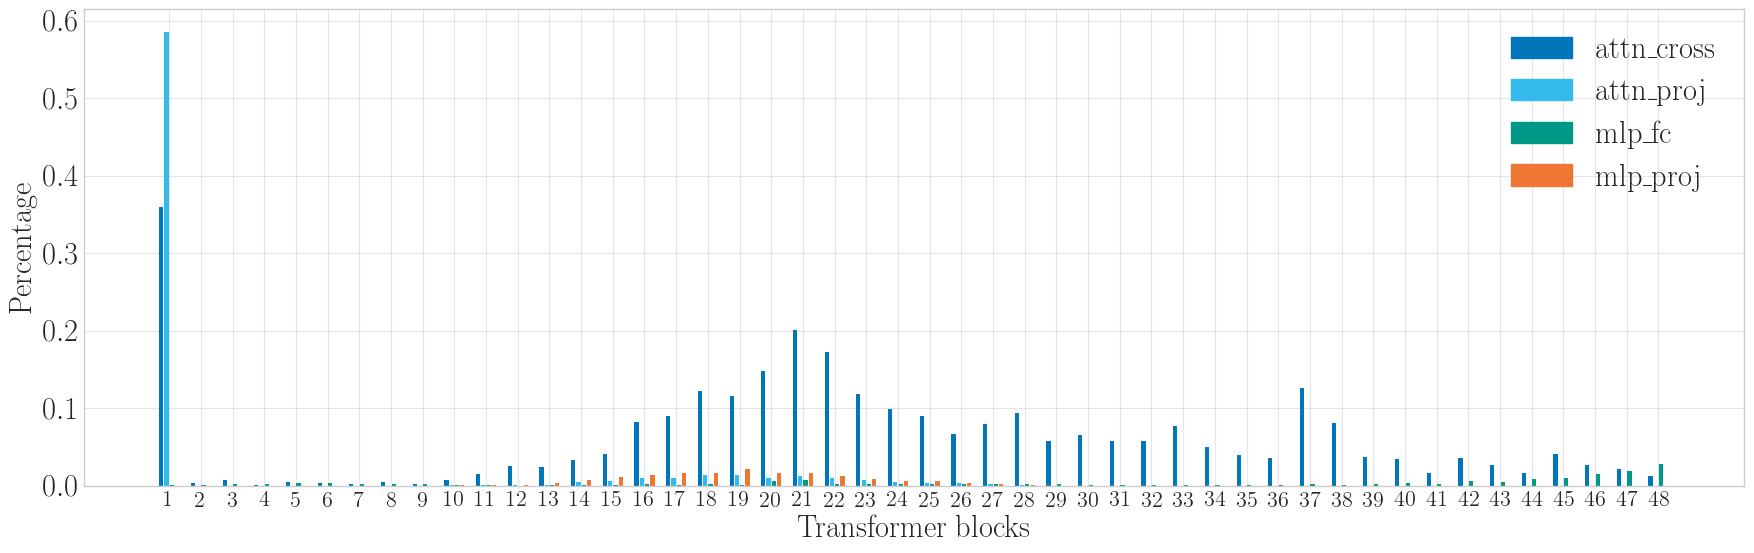

In [3]:
plot_stubborn_neurons_histogram(data, 2000, output_dir, experiment_name)

## Appendix.1. GPT2 XL in the same conditions as GPT2 small (from 2k to 20k) same LR exactly => does not work as expected => ignore

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


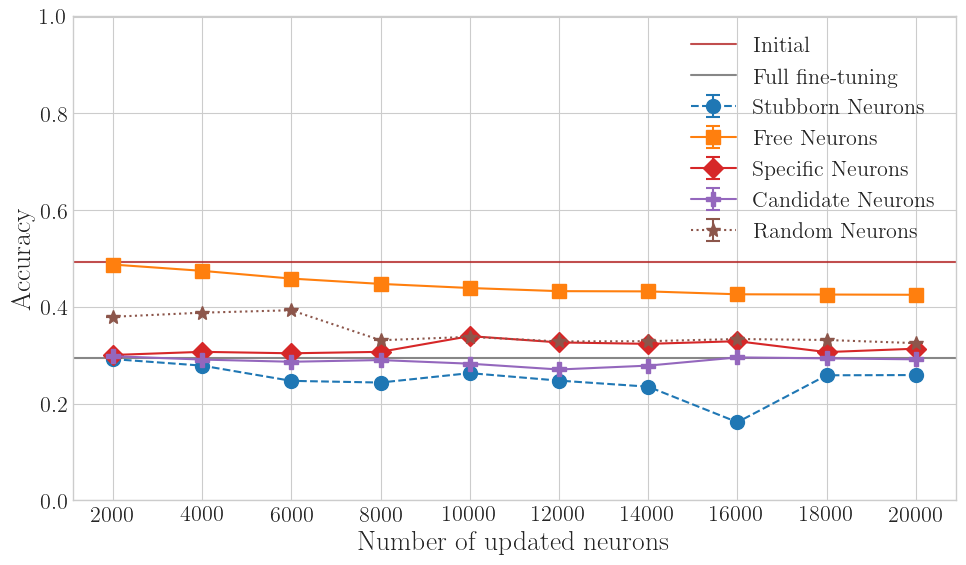

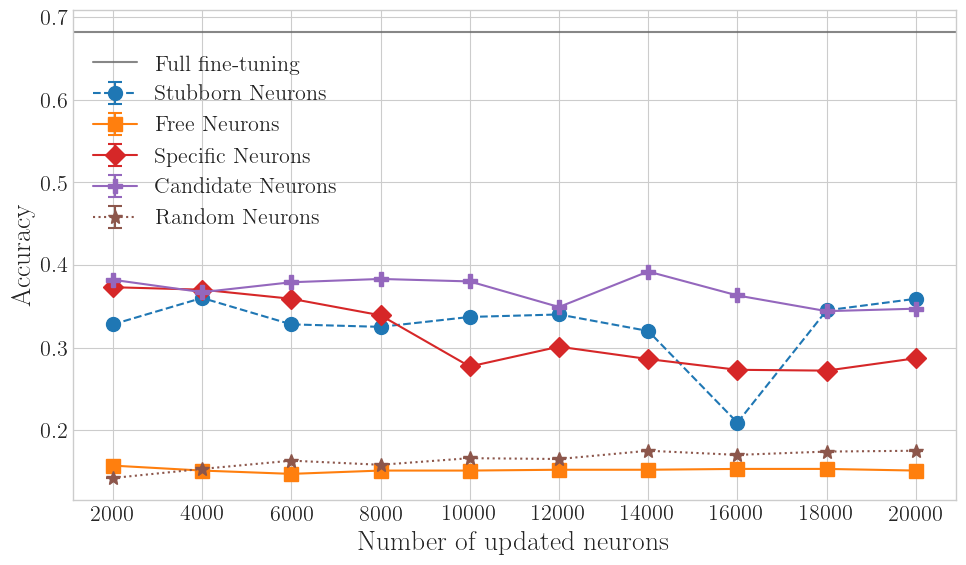

In [ ]:
%load_ext autoreload
%autoreload 2

from retained_plots import plot_pareto_mosaic, plot_old_new_knowledge_all


experiment_name = 'experiment2_1_xl'
filepath = '../experiments/gpt2-xl/experiment_2_1/results/'
filename = 'experiment_2_1_20240911_135230_sameLRassmall.json'

# plot_pareto_mosaic(filepath, filename, experiment_name=experiment_name, strategies=['busy_A', 'free_A', 'spec_B', 'busy_B', 'rnd'])
# plot_old_new_knowledge_all(filepath, filename, experiment_name, strategies=['busy_A', 'free_A', 'spec_B', 'busy_B', 'rnd'])
plot_pareto_mosaic(filepath, filename, experiment_name=experiment_name, strategies=['busy_A', 'free_A', 'spec_B', 'busy_B', 'rnd'])
plot_old_new_knowledge_all(filepath, filename, experiment_name, strategies=['busy_A', 'free_A',  'spec_B', 'busy_B', 'rnd'],loc_old='upper right',bbox_old=(1,1),loc_new='upper left', bbox_new=(0,0.95), y_lim_old_1=0., y_lim_old_2=1.001)


## 6. Old plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json
import pickle
import importlib
import os
import pickle


import sys
# custom path insertion
sys.path.append(os.path.abspath('..'))

import utils 
importlib.reload(utils)

from utils import *

[2024-09-03 16:24:02,008] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)
 [WARNING]  async_io requires the dev libaio .so object and headers but these were not found.

/opt/anaconda/anaconda3/envs/elias/compiler_compat/ld: /tmp/tmpftzh4wyd/test.o: in function `main':
/tmp/tmpftzh4wyd/test.c:1: undefined reference to `io_pgetevents'
collect2: error: ld returned 1 exit status



 [WARNING]  If libaio is already installed (perhaps from source), try setting the CFLAGS and LDFLAGS environment variables to where it can be found.
 [WARNING]  Please specify the CUTLASS repo directory as environment variable $CUTLASS_PATH
 [WARNING]  NVIDIA Inference is only supported on Ampere and newer architectures
 [WARNING]  please install triton==1.0.0 if you want to use sparse attention


In [2]:
with open('../experiments/gpt2-xl/experiment_2_1/results/experiment_2_1_20240716_114247.json', 'r') as file: #experiment_2_1_20240717_115823
    data = json.load(file)


### Accuarcy plot : 2000 1e-5

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def accuracy_vs_neurons_plot(data):
    n_folds =  len(data['results'].keys())
    n_thresh = len(list(data['results'].values())[0]['cftb'].keys())

    fta_accA = 0
    ftb_accA = 0
    ftb_accB = 0

    cftb_free_accA = np.zeros(n_thresh)
    cftb_free_accB = np.zeros(n_thresh)
    cftb_busy_accA = np.zeros(n_thresh)
    cftb_busy_accB = np.zeros(n_thresh)

    cftb_hist_free_accA = np.zeros(n_thresh)
    cftb_hist_free_accB = np.zeros(n_thresh)
    cftb_hist_busy_accA = np.zeros(n_thresh)
    cftb_hist_busy_accB = np.zeros(n_thresh)

    cftb_inter_gen_accA = np.zeros(n_thresh)
    cftb_inter_gen_accB = np.zeros(n_thresh)

    cftb_rnd_accA = np.zeros(n_thresh)
    cftb_rnd_accB = np.zeros(n_thresh)

    # Initialize arrays to store standard deviation values
    std_cftb_busy_accA = np.zeros(n_thresh)
    std_cftb_busy_accB = np.zeros(n_thresh)
    std_cftb_free_accA = np.zeros(n_thresh)
    std_cftb_free_accB = np.zeros(n_thresh)
    std_cftb_inter_gen_accA = np.zeros(n_thresh)
    std_cftb_inter_gen_accB = np.zeros(n_thresh)
    std_cftb_rnd_accA = np.zeros(n_thresh)
    std_cftb_rnd_accB = np.zeros(n_thresh)

    # Arrays to store individual fold results for calculating std dev
    fold_results_cftb_busy_accA = np.zeros((n_folds, n_thresh))
    fold_results_cftb_busy_accB = np.zeros((n_folds, n_thresh))
    fold_results_cftb_free_accA = np.zeros((n_folds, n_thresh))
    fold_results_cftb_free_accB = np.zeros((n_folds, n_thresh))
    fold_results_cftb_inter_gen_accA = np.zeros((n_folds, n_thresh))
    fold_results_cftb_inter_gen_accB = np.zeros((n_folds, n_thresh))
    fold_results_cftb_rnd_accA = np.zeros((n_folds, n_thresh))
    fold_results_cftb_rnd_accB = np.zeros((n_folds, n_thresh))

    for i, fold in enumerate(data['results']):
        fta_accA += data['results'][fold]['fta']['acc_A']

        ftb_accA += data['results'][fold]['ftb']['avg_accA']
        ftb_accB += data['results'][fold]['ftb']['avg_accB']

        cftb_results = data['results'][fold]['cftb']

        fold_results_cftb_busy_accA[i, :] = np.array([cftb_results[t]['busy_A']['avg_accA'] for t in cftb_results]).astype(float)
        fold_results_cftb_busy_accB[i, :] = np.array([cftb_results[t]['busy_A']['avg_accB'] for t in cftb_results]).astype(float)
        fold_results_cftb_free_accA[i, :] = np.array([cftb_results[t]['free_A']['avg_accA'] for t in cftb_results]).astype(float)
        fold_results_cftb_free_accB[i, :] = np.array([cftb_results[t]['free_A']['avg_accB'] for t in cftb_results]).astype(float)
        fold_results_cftb_inter_gen_accA[i, :] = np.array([cftb_results[t]['busy_H_spec']['avg_accA'] for t in cftb_results]).astype(float)
        fold_results_cftb_inter_gen_accB[i, :] = np.array([cftb_results[t]['busy_H_spec']['avg_accB'] for t in cftb_results]).astype(float)
        fold_results_cftb_rnd_accA[i, :] = np.array([cftb_results[t]['rnd']['avg_accA'] for t in cftb_results]).astype(float)
        fold_results_cftb_rnd_accB[i, :] = np.array([cftb_results[t]['rnd']['avg_accB'] for t in cftb_results]).astype(float)

    fta_accA /= n_folds
    ftb_accA /= n_folds
    ftb_accB /= n_folds

    cftb_free_accA = np.mean(fold_results_cftb_free_accA, axis=0)
    cftb_free_accB = np.mean(fold_results_cftb_free_accB, axis=0)
    cftb_busy_accA = np.mean(fold_results_cftb_busy_accA, axis=0)
    cftb_busy_accB = np.mean(fold_results_cftb_busy_accB, axis=0)
    cftb_inter_gen_accA = np.mean(fold_results_cftb_inter_gen_accA, axis=0)
    cftb_inter_gen_accB = np.mean(fold_results_cftb_inter_gen_accB, axis=0)
    cftb_rnd_accA = np.mean(fold_results_cftb_rnd_accA, axis=0)
    cftb_rnd_accB = np.mean(fold_results_cftb_rnd_accB, axis=0)

    # Calculate standard deviation
    std_cftb_busy_accA = np.std(fold_results_cftb_busy_accA, axis=0)
    std_cftb_busy_accB = np.std(fold_results_cftb_busy_accB, axis=0)
    std_cftb_free_accA = np.std(fold_results_cftb_free_accA, axis=0)
    std_cftb_free_accB = np.std(fold_results_cftb_free_accB, axis=0)
    std_cftb_inter_gen_accA = np.std(fold_results_cftb_inter_gen_accA, axis=0)
    std_cftb_inter_gen_accB = np.std(fold_results_cftb_inter_gen_accB, axis=0)
    std_cftb_rnd_accA = np.std(fold_results_cftb_rnd_accA, axis=0)
    std_cftb_rnd_accB = np.std(fold_results_cftb_rnd_accB, axis=0)

    fig, axs = plt.subplots(1, 1, figsize=(12, 6))

    # Creating custom x labels
    x_labels = list(cftb_results.keys())

    # First subplot
    axs.axhline(y=fta_accA, color='firebrick', linestyle='solid', linewidth=1.5, alpha=0.80, label='Initial')
    axs.axhline(y=ftb_accA, color='dimgrey', linestyle='solid', linewidth=1.5, alpha=0.80, label='Full fine-tuning')
    axs.errorbar(x_labels, cftb_busy_accA, yerr=std_cftb_busy_accA, linestyle='--', linewidth=1.5, color='tab:green', marker='.', capsize=2, elinewidth=1, capthick=1, label='Busy neurons')
    axs.errorbar(x_labels, cftb_free_accA, yerr=std_cftb_free_accA, linestyle='-', linewidth=1.5, color='tab:blue', marker='.', capsize=2, elinewidth=1, capthick=1, label='Free neurons')
    axs.errorbar(x_labels, cftb_inter_gen_accA, yerr=std_cftb_inter_gen_accA, linestyle='-.',linewidth=1.5, color='tab:orange', marker='.', capsize=2, elinewidth=1, capthick=1, label='Specific neurons')
    axs.errorbar(x_labels, cftb_rnd_accA, yerr=std_cftb_rnd_accA, linestyle=':', linewidth=1.5, color='tab:purple', marker='.', capsize=2, elinewidth=1, capthick=1, label='Sparse neurons (random)')
    axs.set_xlabel('Number of updated neurons')
    axs.set_ylabel('Accuracy')
    #axs.set_title('Sequential learning experiment - Accuracy of Previous Knowledge')
    axs.legend(loc='lower right')
    axs.grid(True)

    plt.tight_layout()
    plt.show()

    fig, axs = plt.subplots(1, 1, figsize=(12, 6))

    # Second subplot
    axs.axhline(y=ftb_accB, color='dimgrey', linestyle='solid', linewidth=1.5, alpha=0.80, label='Full fine-tuning')
    axs.errorbar(x_labels, cftb_busy_accB, yerr=std_cftb_busy_accB, linestyle='--', linewidth=1.5, color='tab:green', marker='.', capsize=2, elinewidth=1, capthick=1, label='Busy neurons')
    axs.errorbar(x_labels, cftb_free_accB, yerr=std_cftb_free_accB, linestyle='-', linewidth=1.5, color='tab:blue', marker='.', capsize=2, elinewidth=1, capthick=1, label='Free neurons')
    axs.errorbar(x_labels, cftb_inter_gen_accB, yerr=std_cftb_inter_gen_accB, linestyle='-.', linewidth=1.5, color='tab:orange', marker='.', capsize=2, elinewidth=1, capthick=1, label='Specific neurons')
    axs.errorbar(x_labels, cftb_rnd_accB, yerr=std_cftb_rnd_accB, linestyle=':', linewidth=1.5, color='tab:purple', marker='.', capsize=2, elinewidth=1, capthick=1, label='Sparse neurons (random)')
    axs.set_xlabel('Number of updated neurons')
    axs.set_ylabel('Accuracy')
    #axs.set_title('Sequential learning experiment - Accuracy of New Knowledge')
    axs.legend(loc='lower right')
    axs.grid(True)

    plt.tight_layout()
    plt.show()

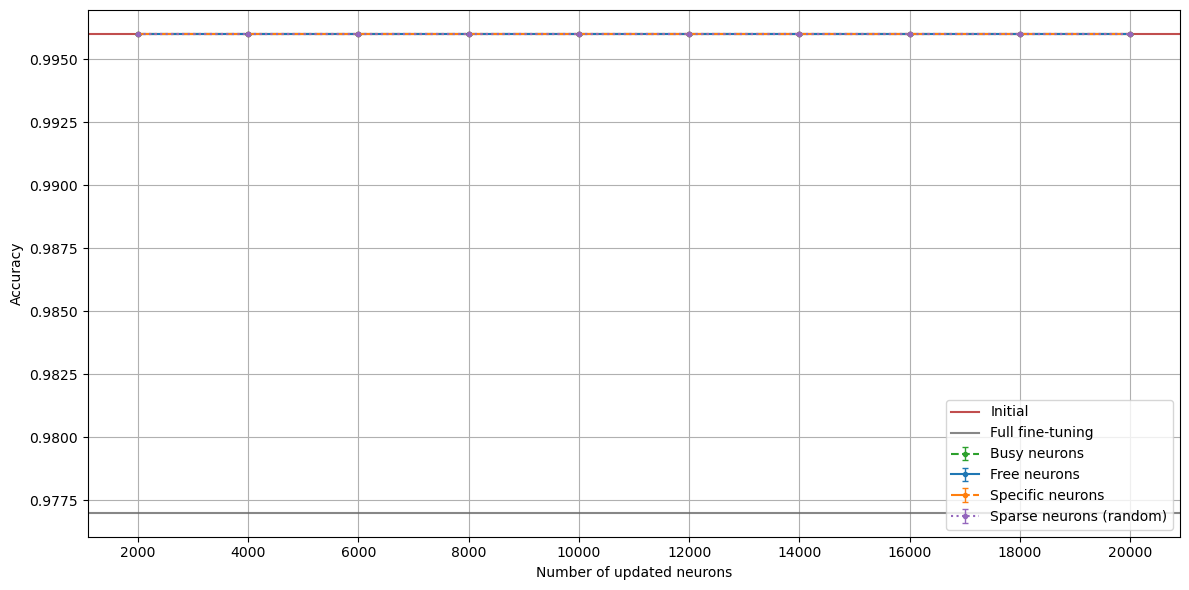

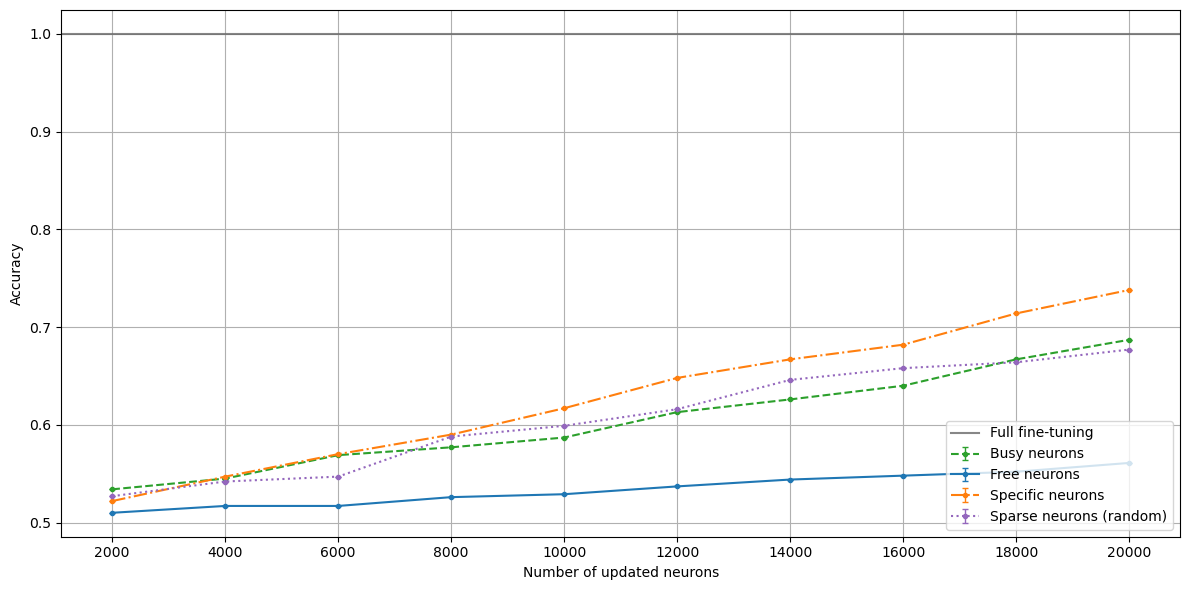

In [5]:
accuracy_vs_neurons_plot(data)

### Gradients distribution plot

MAX VALUE: 30496.0
MIN VALUE: -24416.0


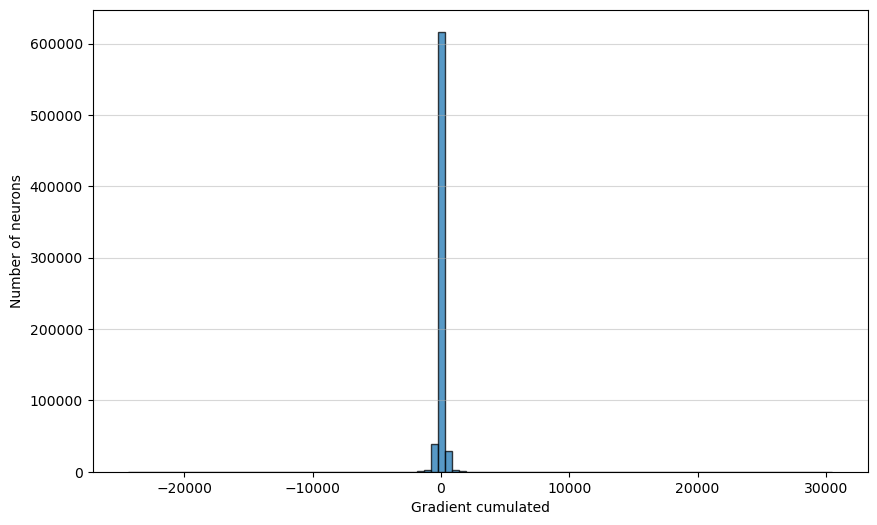

In [4]:
with open('../experiments/gpt2-xl/experiment_2_1/historical_data.pkl', 'rb') as file: 
    data = pickle.load(file)

grad_distr = np.array([])

for layer in data['grad_hist_dict']['raw']:
    grad_distr = np.concatenate((grad_distr, data['grad_hist_dict']['raw'][layer]))

print(f'MAX VALUE: {np.max(grad_distr)}')
print(f'MIN VALUE: {np.min(grad_distr)}')

# Plotting the distribution of the array
plt.figure(figsize=(10, 6))
plt.hist(grad_distr, bins=100, alpha=0.75, color='tab:blue', edgecolor='black')
# plt.title('Distribution of gradients cumulation')
plt.xlabel('Gradient cumulated')
plt.ylabel('Number of neurons')
plt.grid(axis='y', alpha=0.5)  # This makes the grid lines horizontal
plt.show()


### Distribution of busy neurons across layers

0.9993749999999996


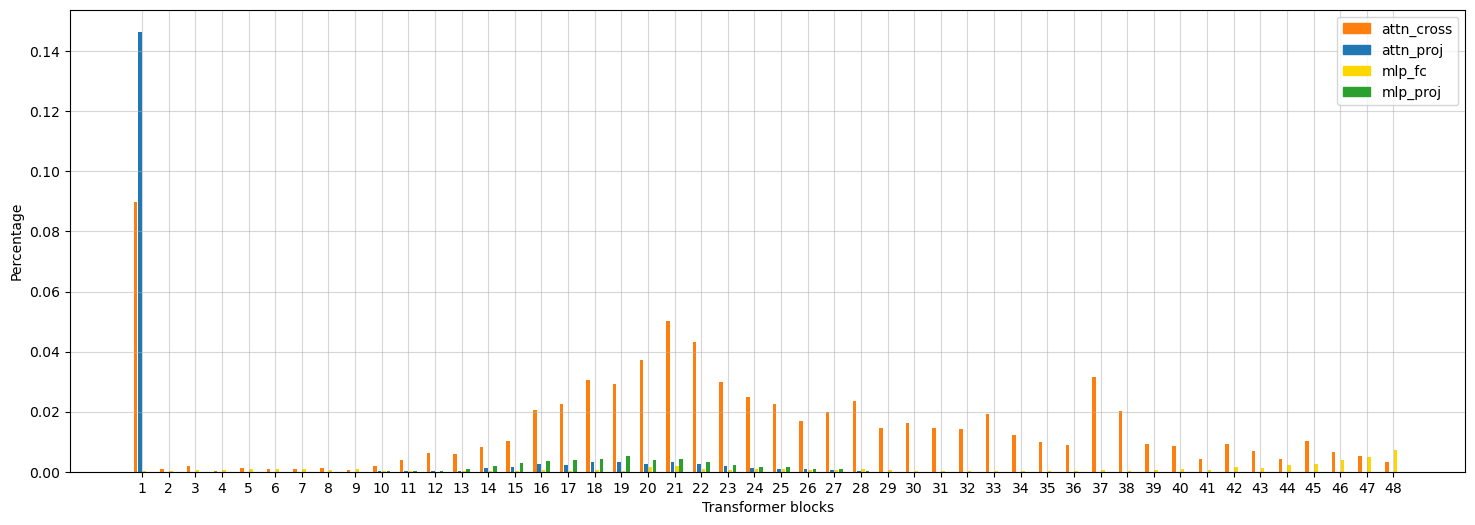

In [6]:
t=8000

# Sample dictionary with numpy arrays as values
data, num_neurons, count = stubborn_extraction(
    historical_path='../experiments/gpt2-xl/experiment_2_1/historical_data.pkl',
    norm=False,
    inverse=True,
    threshold=t,
    return_stubborn=False
    )


x_labels = [f"{k.split('.')[-2]}.{k.split('.')[-1]}.{k.split('.')[-3]}" for k in data.keys()]

# Extract the lengths of the numpy arrays
lengths = [(len(v[0])) / t for v in data.values()]

print(sum(lengths))

# Define the repeating color pattern
colors = ['tab:orange', 'tab:blue', 'gold', 'tab:green']
color_labels = ['attn_cross', 'attn_proj', 'mlp_fc', 'mlp_proj']

# Create the histogram
fig, ax = plt.subplots(1, 1, figsize=(18, 6), sharey=True)

# Define the new positions with larger gaps between groups
positions = []
gap = 2  # Increase the gap between groups
for i in range(len(lengths)):
    group = i // 4
    pos = i + group * gap  # Add a gap of 'gap' between groups
    positions.append(pos)

bars = ax.bar(positions, lengths, color=[colors[i % len(colors)] for i in range(len(lengths))])

# Add labels and title
ax.set_ylabel('Percentage')
ax.set_xlabel('Transformer blocks')

# Set xticks to the center of each group
group_centers = [(1.5 + i * 4 + i * gap) for i in range(48)]
ax.set_xticks(group_centers)
ax.set_xticklabels([str(i + 1) for i in range(48)])

# Create legend
patches = [mpatches.Patch(color=colors[i], label=color_labels[i]) for i in range(len(colors))]
ax.legend(handles=patches)

# Add transparent grid
ax.grid(True, alpha=0.5)

# Display the plot
plt.show()

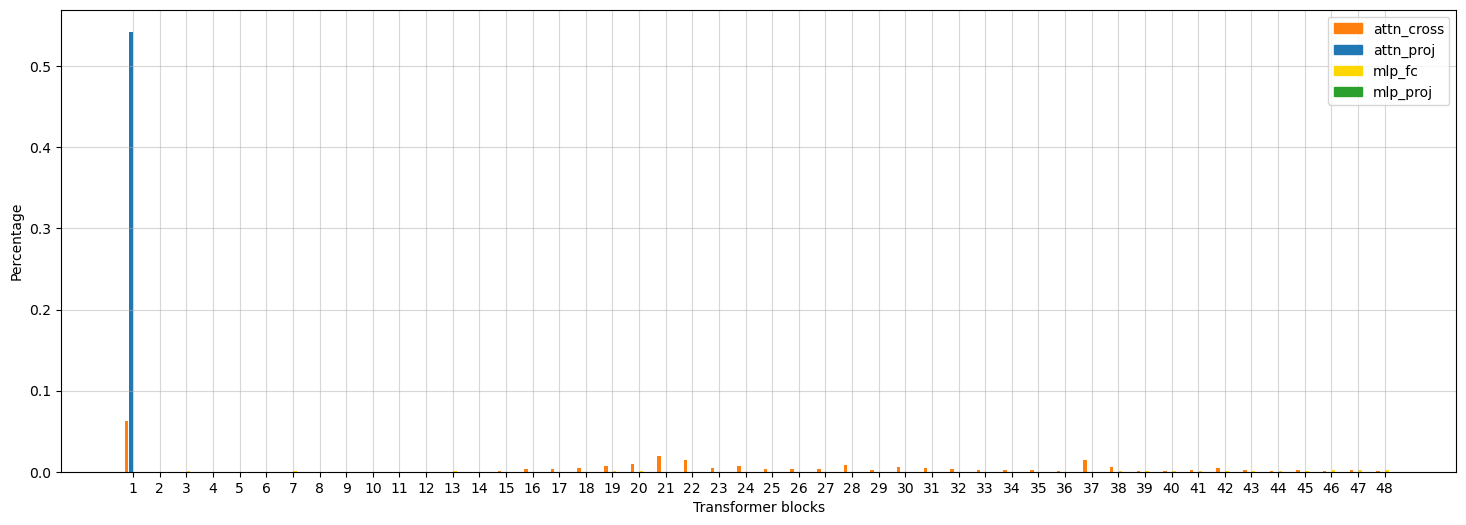

In [7]:
t=2000

# Sample dictionary with numpy arrays as values
data, num_neurons, count = stubborn_extraction(
    historical_path='../experiments/gpt2-xl/experiment_2_1/historical_data.pkl',
    norm=False,
    inverse=True,
    threshold=t,
    return_stubborn=False
    )


x_labels = [f"{k.split('.')[-2]}.{k.split('.')[-1]}.{k.split('.')[-3]}" for k in data.keys()]

# Extract the lengths of the numpy arrays
lengths = [(len(v[0])) / num_neurons[i] for i,v in enumerate(data.values())]

# Define the repeating color pattern
colors = ['tab:orange', 'tab:blue', 'gold', 'tab:green']
color_labels = ['attn_cross', 'attn_proj', 'mlp_fc', 'mlp_proj']

# Create the histogram
fig, ax = plt.subplots(1, 1, figsize=(18, 6), sharey=True)

# Define the new positions with larger gaps between groups
positions = []
gap = 2  # Increase the gap between groups
for i in range(len(lengths)):
    group = i // 4
    pos = i + group * gap  # Add a gap of 'gap' between groups
    positions.append(pos)

bars = ax.bar(positions, lengths, color=[colors[i % len(colors)] for i in range(len(lengths))])

# Add labels and title
ax.set_ylabel('Percentage')
ax.set_xlabel('Transformer blocks')

# Set xticks to the center of each group
group_centers = [(1.5 + i * 4 + i * gap) for i in range(48)]
ax.set_xticks(group_centers)
ax.set_xticklabels([str(i + 1) for i in range(48)])

# Create legend
patches = [mpatches.Patch(color=colors[i], label=color_labels[i]) for i in range(len(colors))]
ax.legend(handles=patches)

# Add transparent grid
ax.grid(True, alpha=0.5)

# Display the plot
plt.show()

### With 10x more neurons compared to gpt2small 

In [6]:
# with open('../results/experiment_2_1/experiment_2_1_2000_1000_10.json', 'r') as file: 
#     data = json.load(file)
with open('../experiments/gpt2-xl/experiment_2_1/results/experiment_2_1_20240717_115823.json', 'r') as file: #
    data = json.load(file)


### Accuarcy plot: same lr from 20k to 200k neurons

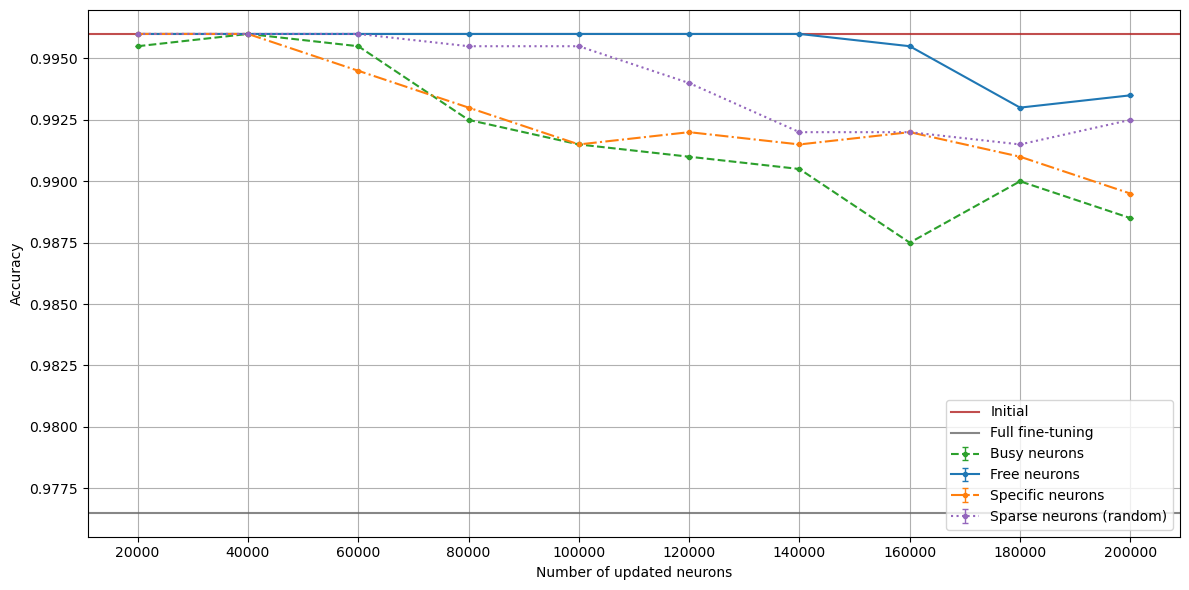

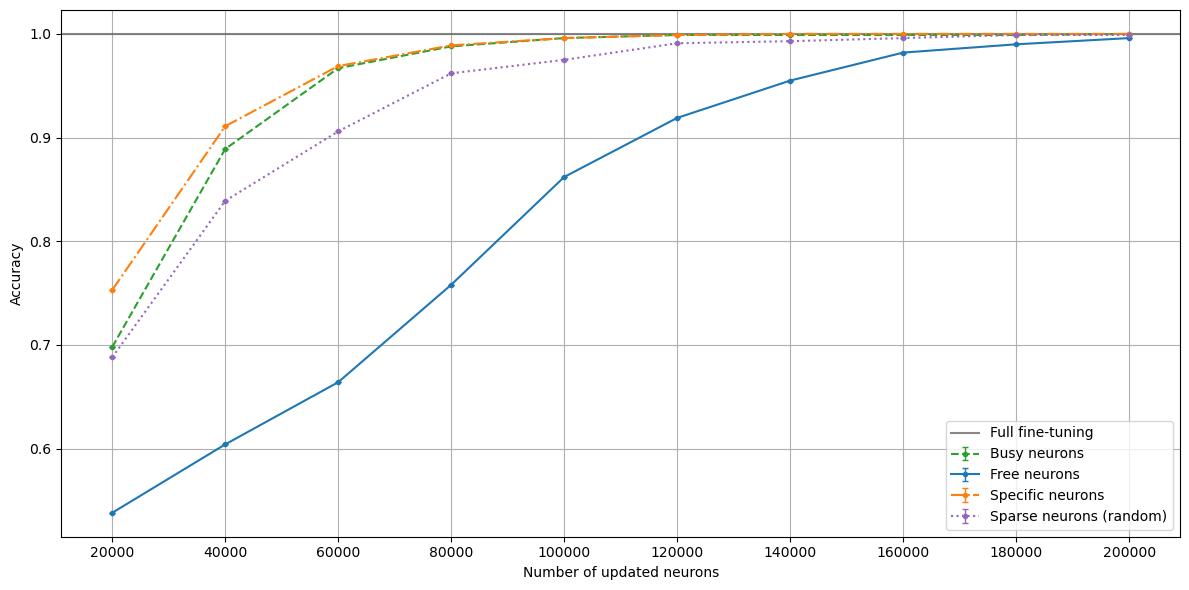

In [7]:
accuracy_vs_neurons_plot(data)

### 3. With 2x higher learning rate (lr = 4e-5)

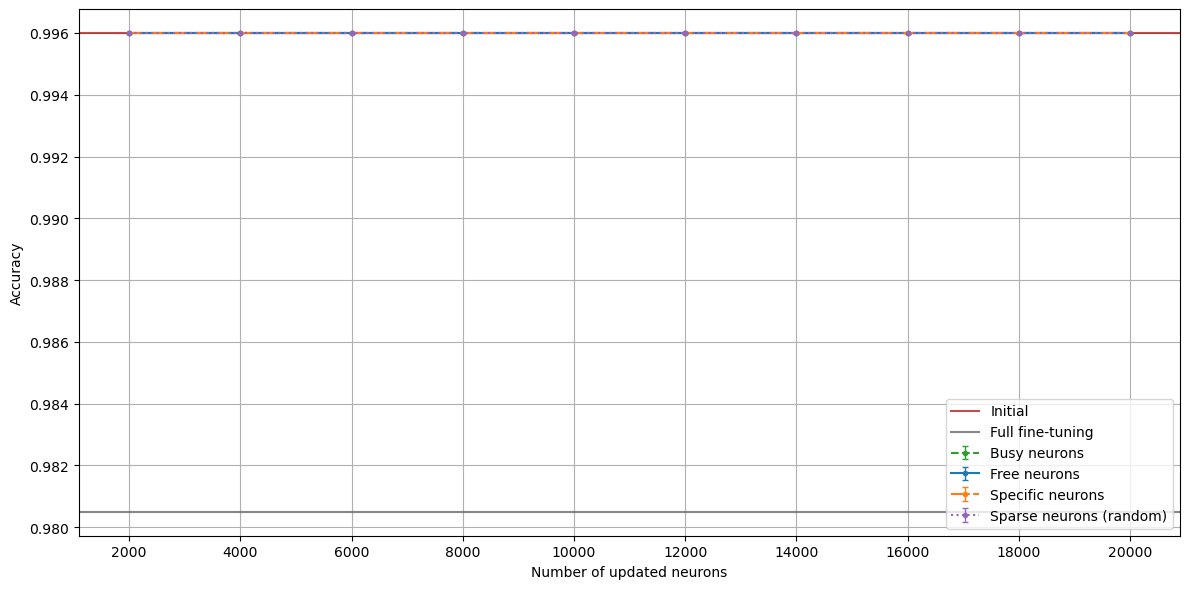

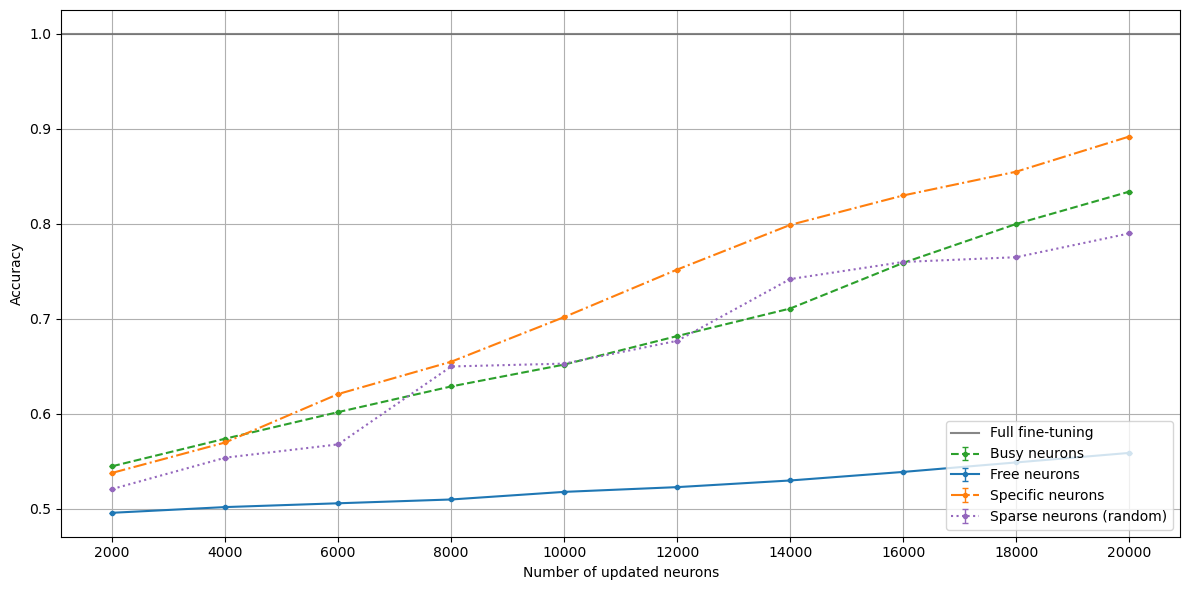

In [8]:
# with open('../results/experiment_2_1/experiment_2_1_2000_1000_10.json', 'r') as file: 
#     data = json.load(file)
with open('../experiments/gpt2-xl/experiment_2_1/results/experiment_2_1_20240717_155441.json', 'r') as file: #
    data = json.load(file)
accuracy_vs_neurons_plot(data)

### 4. With 4x higher learning rate (lr = 8e-5)

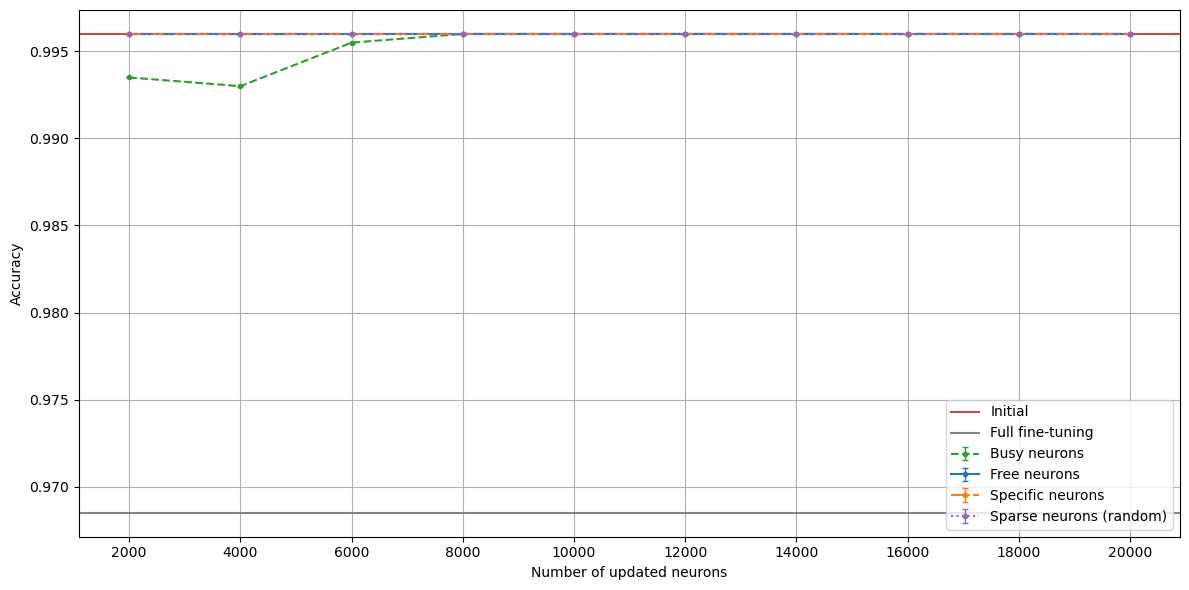

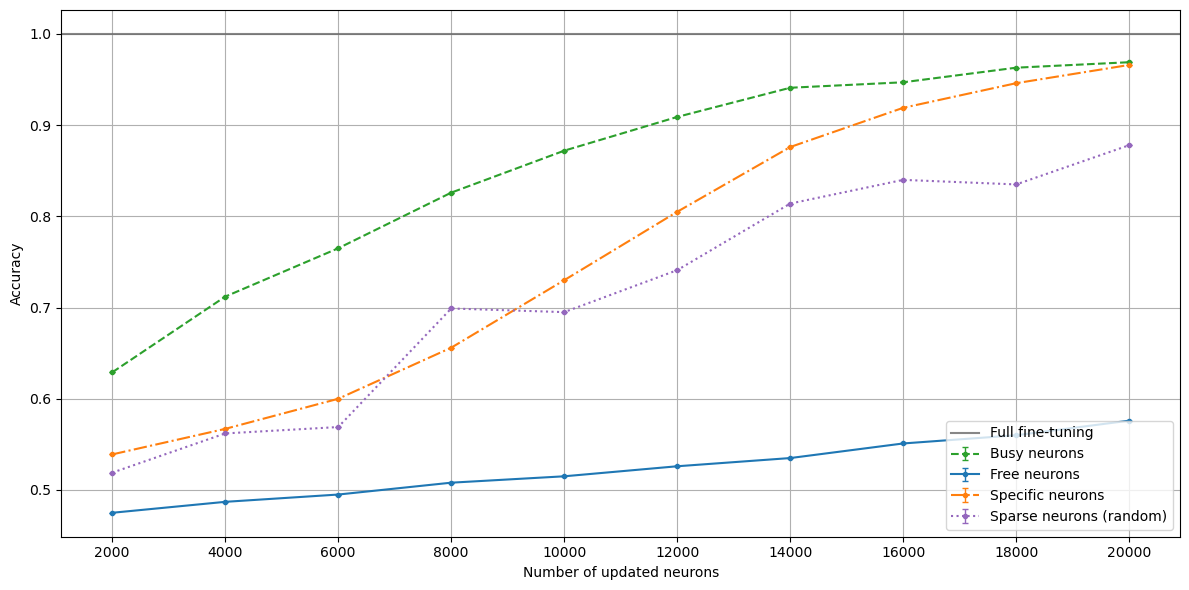

In [9]:
# with open('../results/experiment_2_1/experiment_2_1_2000_1000_10.json', 'r') as file: 
#     data = json.load(file)
#experiment_2_1_20240718_120049
with open('../experiments/gpt2-xl/experiment_2_1/results/experiment_2_1_20240717_232033.json', 'r') as file: #
    data = json.load(file)
accuracy_vs_neurons_plot(data)

### 5. With 4x higher learning rate (lr = 16e-5)

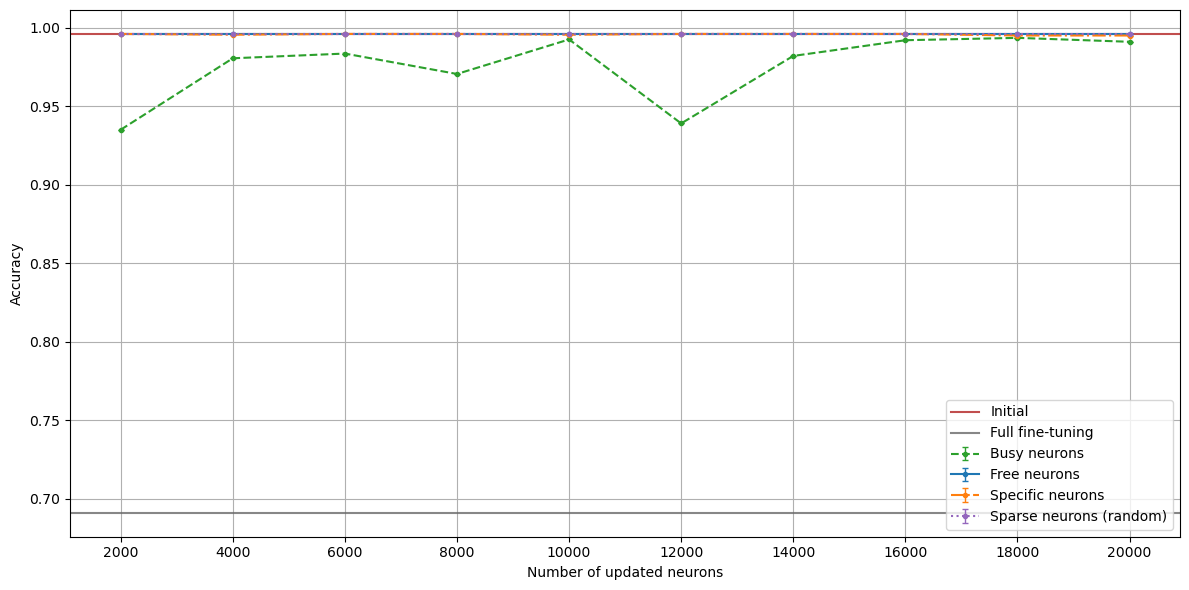

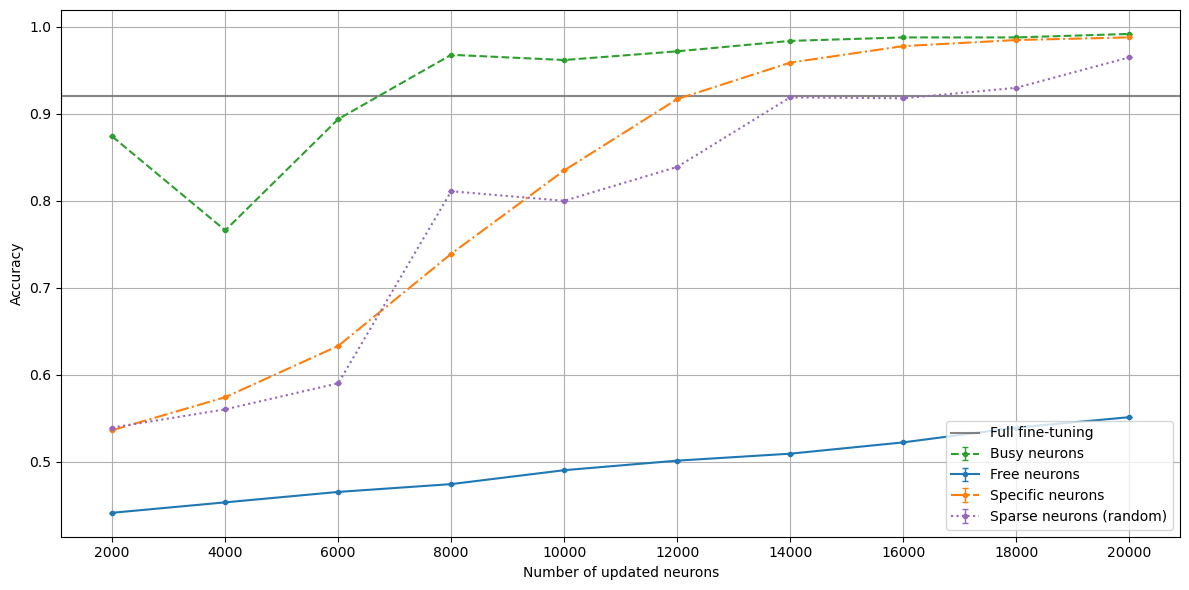

In [10]:

with open('../experiments/gpt2-xl/experiment_2_1/results/experiment_2_1_20240718_120049.json', 'r') as file: #
    data = json.load(file)
accuracy_vs_neurons_plot(data)

### X. Gradients distribution plot -GPT2-XL

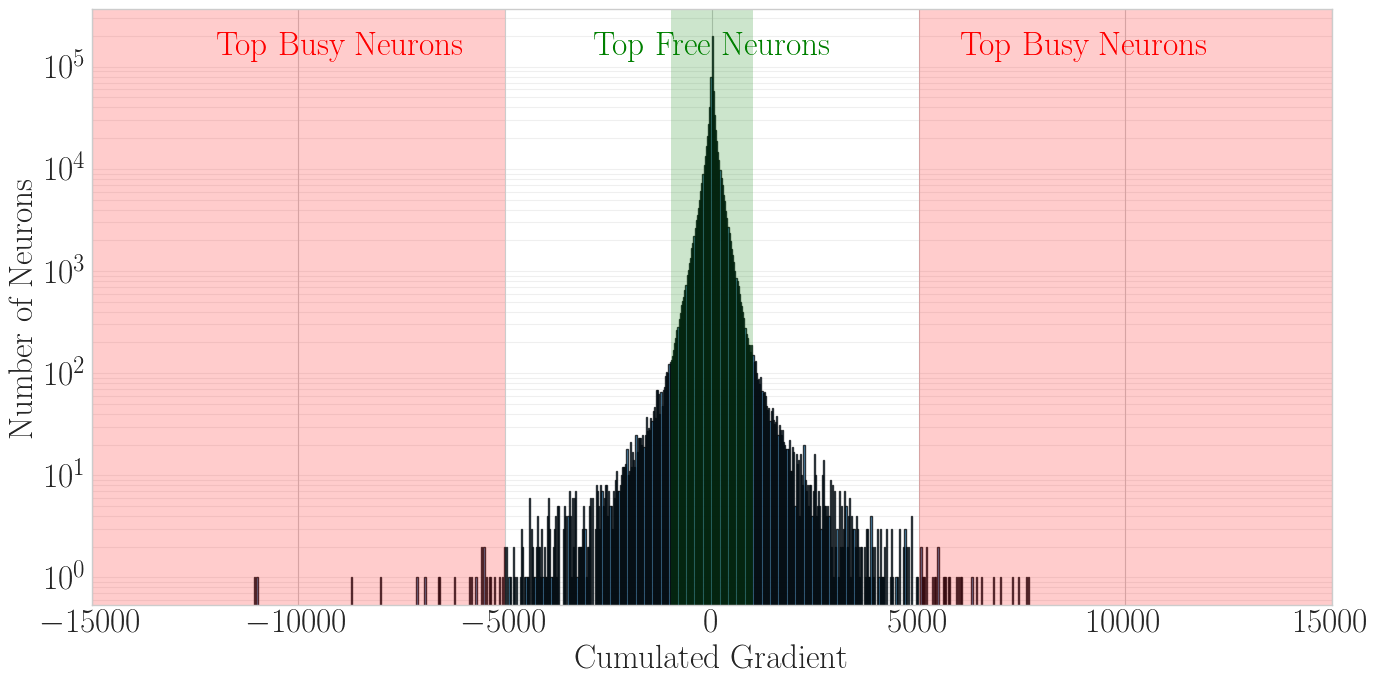

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

fontsize=24

# Set up the plot style
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'font.family': 'serif',
    'text.usetex': True,
    'figure.figsize': (8, 10)
})

# Load the data
with open('../experiments/gpt2-xl/experiment_2_1/historical_data.pkl', 'rb') as file:
    data = pickle.load(file)

grad_distr = np.array([])
for layer in data['grad_hist_dict']['raw']:
    grad_distr = np.concatenate((grad_distr, data['grad_hist_dict']['raw'][layer]))

max_grad = np.max(grad_distr)
min_grad = np.min(grad_distr)

# Adjust figure size to match the first figure's height (below not correct)
height_in_inches = 6.95  # Match height of first figure
width_in_inches = (height_in_inches * 0.68 / 0.34)  # Calculate width for aspect ratio

plt.figure(figsize=(width_in_inches, height_in_inches))
n, bins, patches = plt.hist(grad_distr, bins=2000, alpha=0.75, color='tab:blue', edgecolor='black')

# Set X-axis limits to min and max values
#plt.xlim(min_grad, max_grad)
plt.xlim(-15000, 15000)

plt.xlabel('Cumulated Gradient', fontsize=fontsize)
plt.ylabel('Number of Neurons', fontsize=fontsize)
plt.yscale('log')

plt.grid(axis='y', alpha=0.3, which='both')

busy_threshold = 5000
free_threshold = 1000

plt.axvspan(min_grad, -busy_threshold, facecolor='red', alpha=0.2)
plt.axvspan(busy_threshold, max_grad, facecolor='red', alpha=0.2)
plt.axvspan(-free_threshold, free_threshold, facecolor='green', alpha=0.2)

ymax = plt.gca().get_ylim()[1] * 0.7

plt.annotate('Top Busy Neurons', xy=(-busy_threshold, ymax), xytext=(-busy_threshold * 1.2, ymax * 0.5), 
             color='red', fontsize=fontsize, ha='right', fontweight='bold')

plt.annotate('Top Busy Neurons', xy=(busy_threshold, ymax), xytext=(busy_threshold * 1.2, ymax * 0.5), 
             color='red', fontsize=fontsize, ha='left', fontweight='bold')

plt.annotate('Top Free Neurons', xy=(0, ymax), xytext=(0, ymax * 0.5), 
             color='green', fontsize=fontsize, ha='center', fontweight='bold')

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.tight_layout()
plt.savefig('../analysis/figures/gradient_distribution_font.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

Number of exact zero gradients: 1
Number of very small gradients (0 < |grad| < 1e-05): 587


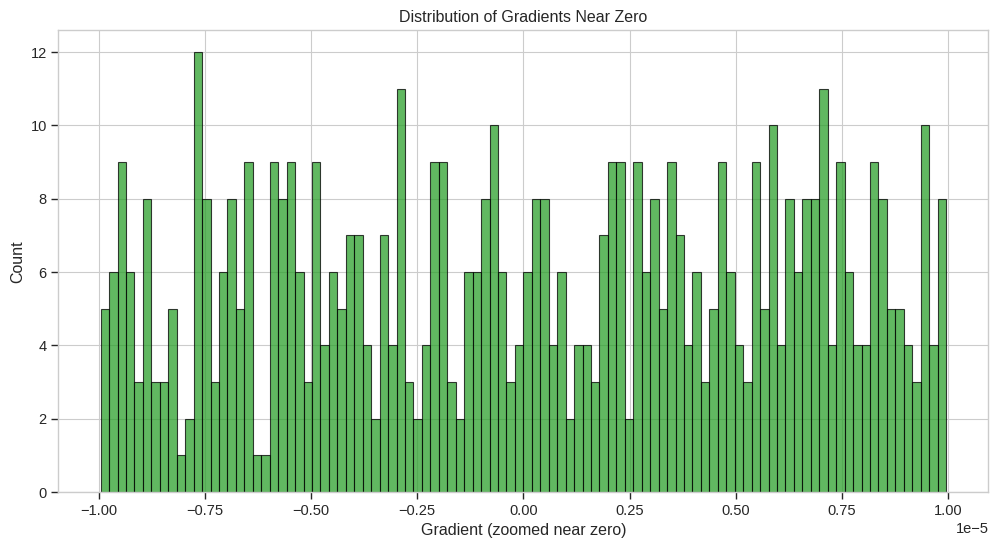

In [7]:
zero_count = np.sum(grad_distr == 0)
print(f"Number of exact zero gradients: {zero_count}")

small_threshold = 1e-5  # Adjust this threshold as needed
small_count = np.sum((grad_distr != 0) & (np.abs(grad_distr) < small_threshold))
print(f"Number of very small gradients (0 < |grad| < {small_threshold}): {small_count}")

plt.figure(figsize=(12, 6))
plt.hist(grad_distr[np.abs(grad_distr) < small_threshold], bins=100, alpha=0.75, color='tab:green', edgecolor='black')
plt.xlabel('Gradient (zoomed near zero)')
plt.ylabel('Count')
plt.title('Distribution of Gradients Near Zero')
plt.grid(True)
plt.show()

### Sparsity as function of lr

In [ ]:
import matplotlib.pyplot as plt
import json
import numpy as np
import os
from retained_plots import strategy_map_short_short
from matplotlib.ticker import ScalarFormatter 

def plot_accuracy_vs_lr(filepath, experiment_files, experiment_name, strategies=None, loc_old='lower left', bbox_old=(0, 0.1), loc_new='lower right', bbox_new=(1, 0), y_lim_old_1=0.0, y_lim_old_2=1.001):
    plt.style.use('seaborn-whitegrid')
    plt.rcParams.update({
        'font.size': 22,
        'axes.labelsize': 22,
        'axes.titlesize': 24,
        'xtick.labelsize': 24,
        'ytick.labelsize': 22,
        'legend.fontsize': 24,
        'font.family': 'serif',
        'text.usetex': True,
        'figure.figsize': (10, 8)
    })

    # Create output directory if it doesn't exist
    output_dir = f"./figures/{experiment_name}"
    os.makedirs(output_dir, exist_ok=True)

    all_strategies = list(strategy_map_short.keys())
    if strategies is None:
        strategies = all_strategies

    learning_rates = []
    results = {strategy: {'accA': [], 'accB': []} for strategy in strategies}
    full_finetuning_results = {'accA': [], 'accB': []}

    for filename in experiment_files:
        try:
            lr = float(filename.split('_')[-1].replace('.json', ''))
            learning_rates.append(lr)
        except ValueError as e:
            print(f"Error parsing learning rate from filename '{filename}': {e}")
            continue

        with open(os.path.join(filepath, filename), 'r') as file:
            data = json.load(file)

        n_folds = len(data['results'].keys())
        fold_full_finetuning_accA = np.zeros(n_folds)
        fold_full_finetuning_accB = np.zeros(n_folds)
        
        for strategy in strategies:
            if strategy not in strategy_map_short:
                print(f"Strategy '{strategy}' not found in strategy_map_short.")
                continue
                
            fold_accA = np.zeros((n_folds, 2))  # 2 for 2000 and 6000 neurons
            fold_accB = np.zeros((n_folds, 2))

            for i, fold in enumerate(data['results'].values()):
                cftb_results = fold['cftb']
                fold_accA[i, 0] = cftb_results['2000'][strategy]['avg_accA']
                fold_accA[i, 1] = cftb_results['6000'][strategy]['avg_accA']
                fold_accB[i, 0] = cftb_results['2000'][strategy]['avg_accB']
                fold_accB[i, 1] = cftb_results['6000'][strategy]['avg_accB']

                # Full finetuning
                fold_full_finetuning_accA[i] = fold['ftb']['avg_accA']
                fold_full_finetuning_accB[i] = fold['ftb']['avg_accB']

            results[strategy]['accA'].append(np.mean(fold_accA, axis=0))
            results[strategy]['accB'].append(np.mean(fold_accB, axis=0))
        full_finetuning_results['accA'].append(np.mean(fold_full_finetuning_accA))
        full_finetuning_results['accB'].append(np.mean(fold_full_finetuning_accB))

    # Plot for 2000 and 6000 neurons
    for i, neurons in enumerate(['2000', '6000']):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
        ax1.plot(learning_rates, full_finetuning_results['accA'],linestyle='solid', linewidth=2, color='black', marker='o', markersize=10, label='Full Finetuning')
        ax2.plot(learning_rates, full_finetuning_results['accB'],linestyle='solid', linewidth=2, color='black', marker='o', markersize=10, label='Full Finetuning')

        for strategy in strategies:
            if strategy not in results or not results[strategy]['accA']:
                print(f"No data for strategy '{strategy}'")
                continue

            accA = [result[i] for result in results[strategy]['accA']]
            accB = [result[i] for result in results[strategy]['accB']]

            ax1.plot(learning_rates, accA, 
                     linestyle=strategy_map_short[strategy]['linestyle'], 
                     linewidth=1.5, 
                     color=strategy_map_short[strategy]['color'], 
                     marker=strategy_map_short[strategy]['marker'], 
                     markersize=10, 
                     label=strategy_map_short[strategy]['label'])

            ax2.plot(learning_rates, accB, 
                     linestyle=strategy_map_short[strategy]['linestyle'], 
                     linewidth=1.5, 
                     color=strategy_map_short[strategy]['color'], 
                     marker=strategy_map_short[strategy]['marker'], 
                     markersize=10, 
                     label=strategy_map_short[strategy]['label'])

        ax1.set_title(f'Old Knowledge ({neurons} neurons)')
        ax1.set_xlabel('Learning Rate')
        ax1.set_ylabel('Accuracy')
        #ax1.set_xscale('log')
        ax1.legend(loc=loc_old, bbox_to_anchor=bbox_old)
        ax1.grid(True)
        ax1.set_ylim(y_lim_old_1, y_lim_old_2)

        ax2.set_title(f'New Knowledge ({neurons} neurons)')
        ax2.set_xlabel('Learning Rate')
        ax2.set_ylabel('Accuracy')
        #ax2.set_xscale('log')
        ax2.legend(loc=loc_new, bbox_to_anchor=bbox_new)
        ax2.grid(True)

		# Use scientific notation on the x-axis
        formatter = ScalarFormatter(useMathText=True)
        formatter.set_scientific(True)
        formatter.set_powerlimits((-1, 1))  # Show scientific notation only for small/large numbers
        
        ax1.xaxis.set_major_formatter(formatter)
        ax2.xaxis.set_major_formatter(formatter)

        plt.tight_layout()
        
        output_file = f"{output_dir}/{experiment_name}_neuron_update_strategies_{neurons}_neurons.pdf"
        print(f"Saving figure to {output_file}")
        plt.savefig(output_file, format='pdf', bbox_inches='tight')
        plt.show()
        plt.close()


filepath = '../experiments/gpt2-xl/experiment_2_1/results/sparsity_lr/'
experiment_files = [
    #'experiment_2_1__2000_6000_2e-5.json', => removed because of error in number of epochs :( 1 instead of 10)
    'experiment_2_1_2000_6000_4e-5.json',
    'experiment_2_1_2000_6000_8e-5.json',
    'experiment_2_1_2000_6000_12e-5.json',
    'experiment_2_1_2000_6000_16e-5.json'
]
experiment_name = 'experiment2_1_xl_lr_study'
#strategies = ['busy_A', 'free_A', 'busy_H_spec', 'rnd', 'busy_B', 'spec_B']
#strategies = ['busy_A', 'free_A', 'rnd', 'busy_B', 'spec_B']
strategies = ['busy_A', 'free_A', 'spec_B', 'busy_B', 'rnd']

plot_accuracy_vs_lr(filepath, experiment_files, experiment_name, strategies, loc_old='lower left', bbox_old=(0, 0), loc_new='upper left', bbox_new=(0, 0.95), y_lim_old_1=0.9 , y_lim_old_2=1.01)